# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기

In [82]:
import pandas as pd
file_path = "dataset/일별역별시간대별승하차인원(2025년1월).csv"
data = pd.read_csv(file_path, encoding='EUC-KR')

In [83]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f"{i} ~ {i + 1}h" for i in range(1, 24)]
columns = columns + time_col + ['24h ~ 01h']
data.columns = columns
data = data.loc[:,:'total']

In [84]:
group = data.groupby(['num','name','date']).sum().reset_index()
# group[group['date'] == '2025-01-01']
group

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [96]:
gdata = group[['name','date','total']]
gdata = gdata.sort_values(by=['name'],ascending=True)
gdata

,name,date,total
1882,가야,2025-01-23,7767
1890,가야,2025-01-31,6806
1889,가야,2025-01-30,3527
1888,가야,2025-01-29,3112
1887,가야,2025-01-28,3893
...,...,...,...
2321,화명,2025-01-28,10076
2322,화명,2025-01-29,6845
2323,화명,2025-01-30,10271
2294,화명,2025-01-01,10496


In [103]:
ndata = gdata.groupby(['name']).sum().reset_index()
ndata = ndata[['name','total']]

In [105]:
Final = ndata.sort_values(by = 'total',ascending=False)
Final.head(10)

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [112]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = 'dataset/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

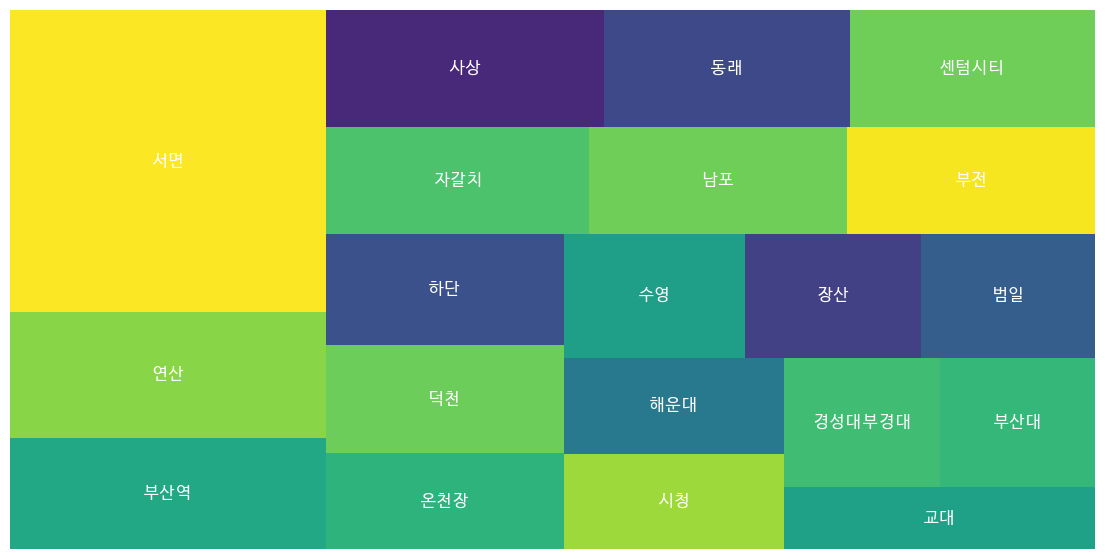

In [138]:
import squarify
plt.figure(figsize=(14,7))
squarify.plot(sizes = Final['total'].iloc[:20], label = Final['name'].iloc[:20], alpha = 1)
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = 'white'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()

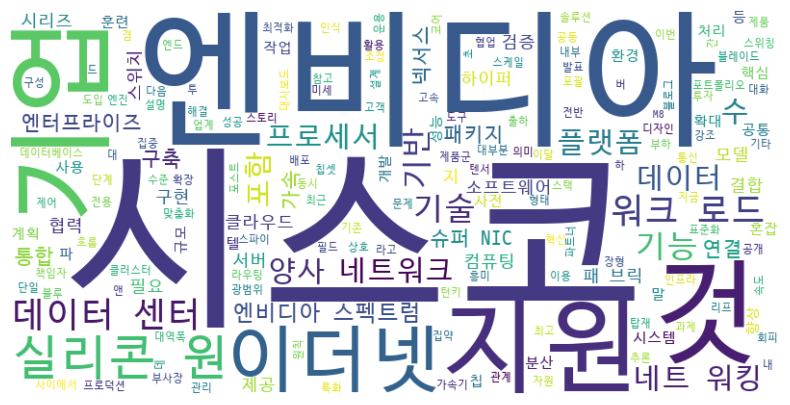

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran

font_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"


text = """
시스코와 엔비디아가 기업의 AI 구현을 지원하기 위한 양사 간의 협업을 확대한다. 시스코의 실리콘 원(Silicon One) 기술과 엔비디아의 이더넷 네트워킹 플랫폼을 결합해 기업 데이터센터 전반에 걸쳐 AI 워크로드를 지원할 계획이다.
시스코의 부사장 겸 최고 제품 책임자인 지투 파텔은 블로그 포스트를 통해 “지금까지 AI에 대한 업계의 대화는 대부분 칩, 컴퓨팅 성능, LLM에 집중됐다. 그러나 기업이 AI 워크로드를 도입하면서, 데이터센터와 클라우드 내부, 그 사이에서 컴퓨팅 자원과 데이터를 연결하는 문제는 AI 혁신의 다음 단계가 될 것이다. 이런 의미에서 네트워크는 기업에서 AI를 성공적으로 확장하는 데 핵심이 될 것”이라고 강조했다.
양사는 시스코의 실리콘 원 기술과 엔비디아의 슈퍼NIC를 결합해 엔비디아 스펙트럼-X 이더넷 네트워킹 플랫폼에 통합할 계획이다.
시스코 실리콘 원 프로세서는 높은 네트워크 대역폭과 성능을 지원하는 전용 프로세서로, 단일 칩셋에서 라우팅 또는 스위칭용으로 맞춤화할 수 있어 네트워크 기능마다 서로 다른 프로세서 아키텍처가 필요하지 않다. 실리콘 원 시스템의 핵심은 향상된 이더넷 기능(향상된 흐름 제어, 혼잡 인식 및 회피 기능 등)을 지원하는 것이다.
참고로, 시스코는 최근 복잡한 데이터 처리 작업을 분산하고 AI 및 대규모 워크로드 처리를 위한 스위치를 구현하기 위해 AMD의 내장형 프로그래머블 DPU(Data Processing Unit)을 포함한 실리콘 원 칩을 기반으로 새로운 데이터센터 스위치 제품군을 공개했다.
슈퍼NIC는 이더넷 기반 클라우드에서 하이퍼스케일 AI 워크로드를 가속화하는 엔비디아의 새로운 네트워크 가속기이다. 엔비디아에 따르면, 슈퍼NIC는 GPU 대 GPU 통신을 위한 고속 네트워크 연결 기능을 갖추고 있으며, 컨버지드 이더넷(RoCE) 기술을 통해 RDMA(Remote Direct Memory Access)를 사용해 400Gb/s에 달하는 속도를 제공한다. 엔비디아 스펙트럼-X(Spectrum-X)는 AI 워크로드를 가속화하기 위한 엔비디아의 포괄적인 이더넷 네트워킹 플랫폼이다.
파텔은 “시스코는 엔비디아 스펙트럼 프로세서와 시스코 OS 소프트웨어를 결합한 시스템을 구축해 기업이 데이터센터에서 시스코 네트워킹과 엔비디아 기술을 동시에 표준화할 수 있도록 할 것”이라며, ”기업이 공통의 넥서스 소프트웨어 스택(NX-OS 및 넥서스 대시보드) 하에서 백엔드 연결에 특화된 엔비디아 스펙트럼 프로세서 또는 시스코 실리콘 원을 활용하면, 흥미롭고 새로운 수준의 상호 운용성을 가능해질 것”이라고 설명했다.
또한 시스코와 엔비디아는 혼잡 관리 및 부하 분산과 같은 공통 과제를 해결하기 위해 양사 포트폴리오를 아우르는 기술에도 투자해 기업이 AI 배포를 가속화할 수 있도록 지원할 것이라고 말했다.
양사는 또한 시스코 실리콘 원, 하이퍼패브릭, 넥서스, UCS 컴퓨트, 옵틱스 및 기타 시스코 기술을 이용해 엔비디아 스펙트럼-X 기반의 엔비디아 클라우드 파트너(NCP) 및 엔터프라이즈 레퍼런스 아키텍처를 만들고 검증하기 위해 협력할 것이라고 말했다.
이번 발표는 시스코와 엔비디아가 기존의 협력관계를 확대한 것이다. 양사는 데이터센터와 엣지에서 AI와 데이터 집약적 워크로드를 지원하기 위해 협력해 왔는데, 이미 시스코 UCS X-시리즈와 UCS X-시리즈 다이렉트를 포함한 시스코의 UCS 랙과 블레이드 서버에 엔비디아의 텐서 코어 GPU를 탑재했다. 통합 솔루션에는 프로덕션에 바로 사용할 수 있는 AI를 위한 사전 훈련된 모델과 개발 도구를 갖춘 엔비디아 AI 엔터프라이즈 소프트웨어가 포함되어 있다.
이달 초, 시스코는 엔터프라이즈 데이터센터 환경을 위한 UCS C845A M8 랙 서버를 출하했다고 밝혔다. 8U 랙 서버는 엔비디아의 HGX 플랫폼을 기반으로 구축됐었으며, LLM 훈련, 모델 미세 조정, 대규모 모델 추론, RAG 등의 AI 작업에 필요한 가속 컴퓨팅 기능을 제공한다.
또한 고객이 필요에 따라 데이터센터나 엣지 환경에 연결할 수 있는 사전 구성, 검증, 최적화된 인프라 패키지인 AI 팟(AI Pod)도 공동 개발하고 있다. AI 팟은 시스코의 검증된 설계 원칙을 기반으로 하며, 엔비디아 AI 엔터프라이즈가 포함되어 있다.
시스코는 시스코 넥서스 하이퍼패브릭 AI 클러스터라고 불리는 턴키 AI 패키지도 제공한다. 400G 및 800G 이더넷 패브릭을 지원하는 스파인 앤 리프 구현을 위한 시스코 6000 시리즈 스위치 형태의 통합 네트워킹 패키지이다. 이 패키지에는 블루필드-3 DPU와 슈퍼NIC를 갖춘 엔비디아 GPU, AI 팟 구축을 위한 레퍼런스 디자인, 통합 스토리지, 데이터베이스, AI 워크로드를 위해 구축된 데이터 기반 기능 엔진을 위한 광범위한 데이터 플랫폼이 포함되어 있다.
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)

wordcloud = WordCloud(font_path= font_path, width=800, height=400,background_color="white").generate(nouns_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.jpg")
plt.show()

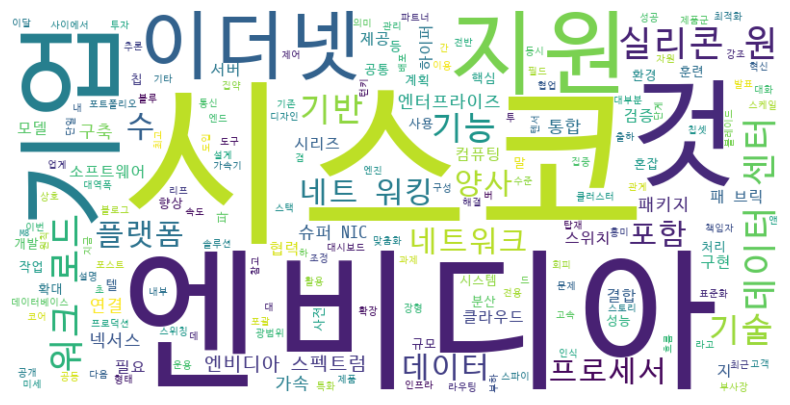

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.font_manager as fm
from konlpy.tag import Komoran

font_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"


text = """
시스코와 엔비디아가 기업의 AI 구현을 지원하기 위한 양사 간의 협업을 확대한다. 시스코의 실리콘 원(Silicon One) 기술과 엔비디아의 이더넷 네트워킹 플랫폼을 결합해 기업 데이터센터 전반에 걸쳐 AI 워크로드를 지원할 계획이다.
시스코의 부사장 겸 최고 제품 책임자인 지투 파텔은 블로그 포스트를 통해 “지금까지 AI에 대한 업계의 대화는 대부분 칩, 컴퓨팅 성능, LLM에 집중됐다. 그러나 기업이 AI 워크로드를 도입하면서, 데이터센터와 클라우드 내부, 그 사이에서 컴퓨팅 자원과 데이터를 연결하는 문제는 AI 혁신의 다음 단계가 될 것이다. 이런 의미에서 네트워크는 기업에서 AI를 성공적으로 확장하는 데 핵심이 될 것”이라고 강조했다.
양사는 시스코의 실리콘 원 기술과 엔비디아의 슈퍼NIC를 결합해 엔비디아 스펙트럼-X 이더넷 네트워킹 플랫폼에 통합할 계획이다.
시스코 실리콘 원 프로세서는 높은 네트워크 대역폭과 성능을 지원하는 전용 프로세서로, 단일 칩셋에서 라우팅 또는 스위칭용으로 맞춤화할 수 있어 네트워크 기능마다 서로 다른 프로세서 아키텍처가 필요하지 않다. 실리콘 원 시스템의 핵심은 향상된 이더넷 기능(향상된 흐름 제어, 혼잡 인식 및 회피 기능 등)을 지원하는 것이다.
참고로, 시스코는 최근 복잡한 데이터 처리 작업을 분산하고 AI 및 대규모 워크로드 처리를 위한 스위치를 구현하기 위해 AMD의 내장형 프로그래머블 DPU(Data Processing Unit)을 포함한 실리콘 원 칩을 기반으로 새로운 데이터센터 스위치 제품군을 공개했다.
슈퍼NIC는 이더넷 기반 클라우드에서 하이퍼스케일 AI 워크로드를 가속화하는 엔비디아의 새로운 네트워크 가속기이다. 엔비디아에 따르면, 슈퍼NIC는 GPU 대 GPU 통신을 위한 고속 네트워크 연결 기능을 갖추고 있으며, 컨버지드 이더넷(RoCE) 기술을 통해 RDMA(Remote Direct Memory Access)를 사용해 400Gb/s에 달하는 속도를 제공한다. 엔비디아 스펙트럼-X(Spectrum-X)는 AI 워크로드를 가속화하기 위한 엔비디아의 포괄적인 이더넷 네트워킹 플랫폼이다.
파텔은 “시스코는 엔비디아 스펙트럼 프로세서와 시스코 OS 소프트웨어를 결합한 시스템을 구축해 기업이 데이터센터에서 시스코 네트워킹과 엔비디아 기술을 동시에 표준화할 수 있도록 할 것”이라며, ”기업이 공통의 넥서스 소프트웨어 스택(NX-OS 및 넥서스 대시보드) 하에서 백엔드 연결에 특화된 엔비디아 스펙트럼 프로세서 또는 시스코 실리콘 원을 활용하면, 흥미롭고 새로운 수준의 상호 운용성을 가능해질 것”이라고 설명했다.
또한 시스코와 엔비디아는 혼잡 관리 및 부하 분산과 같은 공통 과제를 해결하기 위해 양사 포트폴리오를 아우르는 기술에도 투자해 기업이 AI 배포를 가속화할 수 있도록 지원할 것이라고 말했다.
양사는 또한 시스코 실리콘 원, 하이퍼패브릭, 넥서스, UCS 컴퓨트, 옵틱스 및 기타 시스코 기술을 이용해 엔비디아 스펙트럼-X 기반의 엔비디아 클라우드 파트너(NCP) 및 엔터프라이즈 레퍼런스 아키텍처를 만들고 검증하기 위해 협력할 것이라고 말했다.
이번 발표는 시스코와 엔비디아가 기존의 협력관계를 확대한 것이다. 양사는 데이터센터와 엣지에서 AI와 데이터 집약적 워크로드를 지원하기 위해 협력해 왔는데, 이미 시스코 UCS X-시리즈와 UCS X-시리즈 다이렉트를 포함한 시스코의 UCS 랙과 블레이드 서버에 엔비디아의 텐서 코어 GPU를 탑재했다. 통합 솔루션에는 프로덕션에 바로 사용할 수 있는 AI를 위한 사전 훈련된 모델과 개발 도구를 갖춘 엔비디아 AI 엔터프라이즈 소프트웨어가 포함되어 있다.
이달 초, 시스코는 엔터프라이즈 데이터센터 환경을 위한 UCS C845A M8 랙 서버를 출하했다고 밝혔다. 8U 랙 서버는 엔비디아의 HGX 플랫폼을 기반으로 구축됐었으며, LLM 훈련, 모델 미세 조정, 대규모 모델 추론, RAG 등의 AI 작업에 필요한 가속 컴퓨팅 기능을 제공한다.
또한 고객이 필요에 따라 데이터센터나 엣지 환경에 연결할 수 있는 사전 구성, 검증, 최적화된 인프라 패키지인 AI 팟(AI Pod)도 공동 개발하고 있다. AI 팟은 시스코의 검증된 설계 원칙을 기반으로 하며, 엔비디아 AI 엔터프라이즈가 포함되어 있다.
시스코는 시스코 넥서스 하이퍼패브릭 AI 클러스터라고 불리는 턴키 AI 패키지도 제공한다. 400G 및 800G 이더넷 패브릭을 지원하는 스파인 앤 리프 구현을 위한 시스코 6000 시리즈 스위치 형태의 통합 네트워킹 패키지이다. 이 패키지에는 블루필드-3 DPU와 슈퍼NIC를 갖춘 엔비디아 GPU, AI 팟 구축을 위한 레퍼런스 디자인, 통합 스토리지, 데이터베이스, AI 워크로드를 위해 구축된 데이터 기반 기능 엔진을 위한 광범위한 데이터 플랫폼이 포함되어 있다.
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)

wordcloud = WordCloud(font_path= font_path, width=800, height=400,background_color="white").generate(nouns_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig("word2.jpg")
plt.show()

In [70]:
from collections import Counter

word_counts = Counter(nouns)
print(word_counts)

Counter({'시스코': 21, '엔비디아': 20, '데이터': 11, '것': 8, '기업': 7, '지원': 7, '실리콘': 7, '원': 7, '이더넷': 7, '센터': 7, '워크': 7, '로드': 7, '기술': 6, '기능': 6, '기반': 6, '양사': 5, '네트': 5, '워킹': 5, '플랫폼': 5, '네트워크': 5, '스펙트럼': 5, '프로세서': 5, '수': 5, '포함': 5, '연결': 4, '슈퍼': 4, 'NIC': 4, '통합': 4, '가속': 4, '구축': 4, '넥서스': 4, '엔터프라이즈': 4, '패키지': 4, '구현': 3, '결합': 3, '지': 3, '컴퓨팅': 3, '클라우드': 3, '필요': 3, '스위치': 3, '하이퍼': 3, '제공': 3, '소프트웨어': 3, '패': 3, '브릭': 3, '검증': 3, '협력': 3, '시리즈': 3, '모델': 3, '확대': 2, '계획': 2, '파': 2, '텔': 2, '칩': 2, '성능': 2, '핵심': 2, '시스템': 2, '향상': 2, '혼잡': 2, '등': 2, '작업': 2, '분산': 2, '규모': 2, '사용': 2, '공통': 2, '말': 2, '사전': 2, '훈련': 2, '개발': 2, '환경': 2, '서버': 2, '간': 1, '협업': 1, '전반': 1, '부사장': 1, '겸': 1, '최고': 1, '제품': 1, '책임자': 1, '투': 1, '블로그': 1, '포스트': 1, '지금': 1, '업계': 1, '대화': 1, '대부분': 1, '집중': 1, '도입': 1, '내부': 1, '사이에서': 1, '자원': 1, '문제': 1, '혁신': 1, '다음': 1, '단계': 1, '의미': 1, '성공': 1, '확장': 1, '데': 1, '강조': 1, '대역폭': 1, '전용': 1, '단일': 1, '칩셋': 1, '라우팅': 1, '스위칭': 1, '맞춤화': 1

In [72]:
from collections import Counter

text = """
"""

komoran = Komoran()
nouns = komoran.nouns(text)
nouns_text = " ".join(nouns)
word_counts = Counter(nouns)


def 글자수추출기(text):
    komoran = Komoran()
    nouns = komoran.nouns(text)
    
    count_dict = {}
    
    for i ,n in enumerate(nouns):
        if n not in count_dict.keys():
            count_dict[n] = 1
        else:
            count_dict[n] = count_dict[n] + 1
    
    sort_dict = dict(sorted(count_dict.items(), key = lambda item : item[1], reverse=True))
    print(sort_dict)

print(word_counts)
글자수추출기(text)

Counter({'시스코': 21, '엔비디아': 20, '데이터': 11, '것': 8, '기업': 7, '지원': 7, '실리콘': 7, '원': 7, '이더넷': 7, '센터': 7, '워크': 7, '로드': 7, '기술': 6, '기능': 6, '기반': 6, '양사': 5, '네트': 5, '워킹': 5, '플랫폼': 5, '네트워크': 5, '스펙트럼': 5, '프로세서': 5, '수': 5, '포함': 5, '연결': 4, '슈퍼': 4, 'NIC': 4, '통합': 4, '가속': 4, '구축': 4, '넥서스': 4, '엔터프라이즈': 4, '패키지': 4, '구현': 3, '결합': 3, '지': 3, '컴퓨팅': 3, '클라우드': 3, '필요': 3, '스위치': 3, '하이퍼': 3, '제공': 3, '소프트웨어': 3, '패': 3, '브릭': 3, '검증': 3, '협력': 3, '시리즈': 3, '모델': 3, '확대': 2, '계획': 2, '파': 2, '텔': 2, '칩': 2, '성능': 2, '핵심': 2, '시스템': 2, '향상': 2, '혼잡': 2, '등': 2, '작업': 2, '분산': 2, '규모': 2, '사용': 2, '공통': 2, '말': 2, '사전': 2, '훈련': 2, '개발': 2, '환경': 2, '서버': 2, '간': 1, '협업': 1, '전반': 1, '부사장': 1, '겸': 1, '최고': 1, '제품': 1, '책임자': 1, '투': 1, '블로그': 1, '포스트': 1, '지금': 1, '업계': 1, '대화': 1, '대부분': 1, '집중': 1, '도입': 1, '내부': 1, '사이에서': 1, '자원': 1, '문제': 1, '혁신': 1, '다음': 1, '단계': 1, '의미': 1, '성공': 1, '확장': 1, '데': 1, '강조': 1, '대역폭': 1, '전용': 1, '단일': 1, '칩셋': 1, '라우팅': 1, '스위칭': 1, '맞춤화': 1

In [97]:
komoran = Komoran()
nouns = komoran.nouns(text)

count_dict = {}

for i ,n in enumerate(nouns):
    if n not in count_dict.keys():
        count_dict[n] = 1
    else:
        count_dict[n] = count_dict[n] + 1

sort = sorted([t[1] for t in list(count_dict.items())],reverse=True)
sort_dict = list(count_dict.items())
# sort_dict

lambda i : i[1], sort_dict

(<function __main__.<lambda>(i)>,
 [('시스코', 21),
  ('엔비디아', 20),
  ('기업', 7),
  ('구현', 3),
  ('지원', 7),
  ('양사', 5),
  ('간', 1),
  ('협업', 1),
  ('확대', 2),
  ('실리콘', 7),
  ('원', 7),
  ('기술', 6),
  ('이더넷', 7),
  ('네트', 5),
  ('워킹', 5),
  ('플랫폼', 5),
  ('결합', 3),
  ('데이터', 11),
  ('센터', 7),
  ('전반', 1),
  ('워크', 7),
  ('로드', 7),
  ('계획', 2),
  ('부사장', 1),
  ('겸', 1),
  ('최고', 1),
  ('제품', 1),
  ('책임자', 1),
  ('지', 3),
  ('투', 1),
  ('파', 2),
  ('텔', 2),
  ('블로그', 1),
  ('포스트', 1),
  ('지금', 1),
  ('업계', 1),
  ('대화', 1),
  ('대부분', 1),
  ('칩', 2),
  ('컴퓨팅', 3),
  ('성능', 2),
  ('집중', 1),
  ('도입', 1),
  ('클라우드', 3),
  ('내부', 1),
  ('사이에서', 1),
  ('자원', 1),
  ('연결', 4),
  ('문제', 1),
  ('혁신', 1),
  ('다음', 1),
  ('단계', 1),
  ('것', 8),
  ('의미', 1),
  ('네트워크', 5),
  ('성공', 1),
  ('확장', 1),
  ('데', 1),
  ('핵심', 2),
  ('강조', 1),
  ('슈퍼', 4),
  ('NIC', 4),
  ('스펙트럼', 5),
  ('통합', 4),
  ('프로세서', 5),
  ('대역폭', 1),
  ('전용', 1),
  ('단일', 1),
  ('칩셋', 1),
  ('라우팅', 1),
  ('스위칭', 1),
  ('맞춤화', 1),
  ('수', 5

# 온라인 쇼핑몰 매출관계 분석

- 국가통계포털
- 온라인쇼핑몰 판매매체별 상품군별 거래액
- 합계 등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
- 행렬 전환

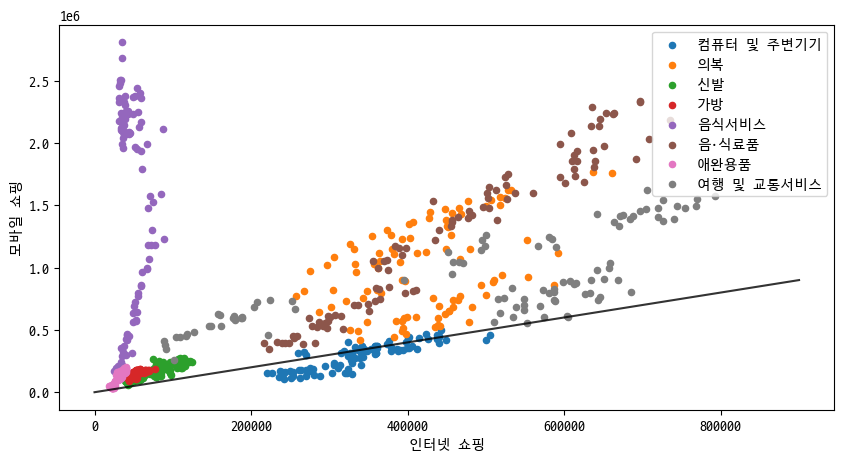

In [139]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
from datetime import datetime

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "dataset/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding='EUC-KR')
ori.columns = ["category", "date", "internet", "mobile"]
ori['date'] = ori['date'].map(lambda x : x.rstrip(' p)'))

ori['date'] = pd.to_datetime(ori["date"], format='%Y.%m')

ex1_data = ori.copy()

obj = ['컴퓨터 및 주변기기','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(20)

fig, ax = plt.subplots(figsize = (10, 5))

for o in obj:
    category_data = ex1_data[ex1_data['category'] == o]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s = 20, label = o)

ax.set_xlabel('인터넷 쇼핑')
ax.set_ylabel('모바일 쇼핑')
ax.legend(loc="best")
ax.plot([0,900000],[0,900000], 'k-', alpha = 0.8)
plt.show()


# 교통사고 유형별 발생 분석
- 공공 데이터 교통사고 유형, 검색어 : 전국 교통사고 다발 지역

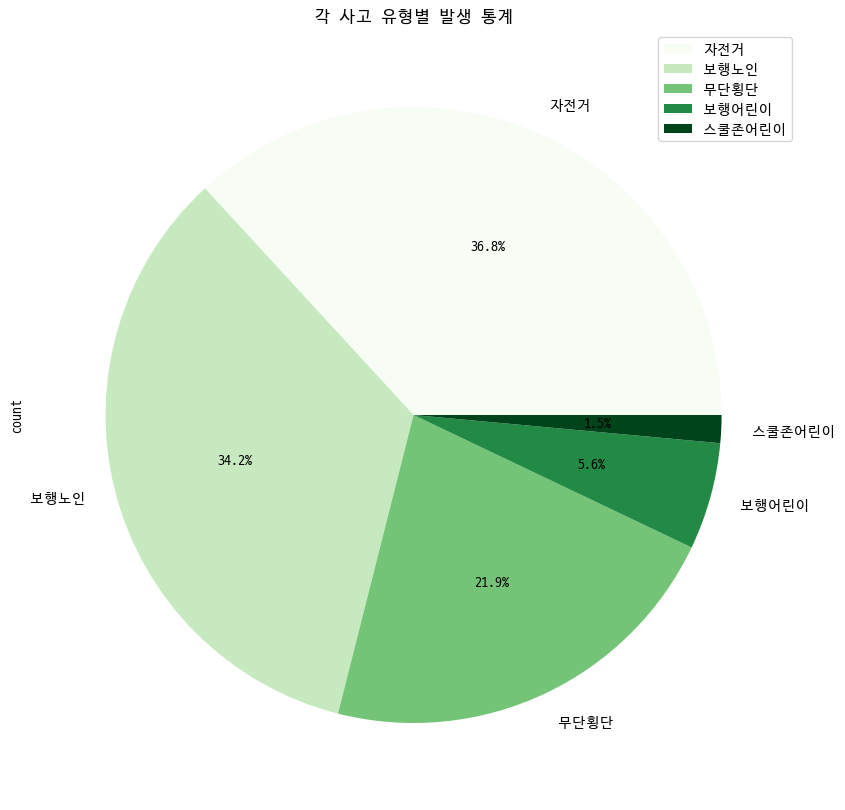

['스쿨존어린이', '보행어린이', '보행노인', '자전거', '무단횡단']


<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from IPython.display import display, HTML
import pandas as pd

d2_path = "dataset/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(path=d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

file_path = "dataset/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding = 'EUC_KR')
ori.head()

ori_data = ori.groupby('사고유형구분')['사고건수'].sum().reset_index(name = "count")
ori_data = ori_data.sort_values('count',ascending=False)
ori_data = ori_data.rename(columns={'사고유형구분':'type'})
ori_data

ori_data.plot(kind = 'pie', y = 'count', labels = ori_data['type'], title = "각 사고 유형별 발생 통계", cmap = matplotlib.cm.Greens, autopct = '%2.1f%%', figsize = (10,10), startangle = 0)
plt.show()
plt.savefig('chart/accident.jpg')

ex_data = ori.copy()
ex_data = ex_data.rename(columns = {'사고유형구분':'type'})
ex2_data = list(set(ex_data['type']))
print(ex2_data)
data_list = []
for e in ex2_data:
    data_list.append(ex_data[ex_data['type'] == e])
# print(data_list)

total_list = []
for d in data_list:
    result = d.groupby('사고연도')['사고건수'].sum().reset_index(name = 'count')
    total_list.append(result)

# for e in range(len(ex2_data)):
#     total_list[e].plot(
#         kind = 'pie',
#         y = 'count',
#         labels = total_list[e]['사고연도'],
#         figsize = (7,7),
#         autopct = '%.1f%%',
#         title = '연도별 ' + ex2_data[e] + '사고 발생 통계',
#         cmap = matplotlib.cm.Blues,
#         startangle = 90
#     )
#     plt.savefig(f'./chart/accident{e}.jpg')
#     plt.show()

html = f"""
<div style = "display: flex; flex-wrap: wrap; gap: 20px; width: 100%; padding: 20px;">"""
for i in range(len(ex2_data)):
    html += f"""<img src = "chart/accident{i}.jpg">"""
html += """</div>"""
display(HTML(html))

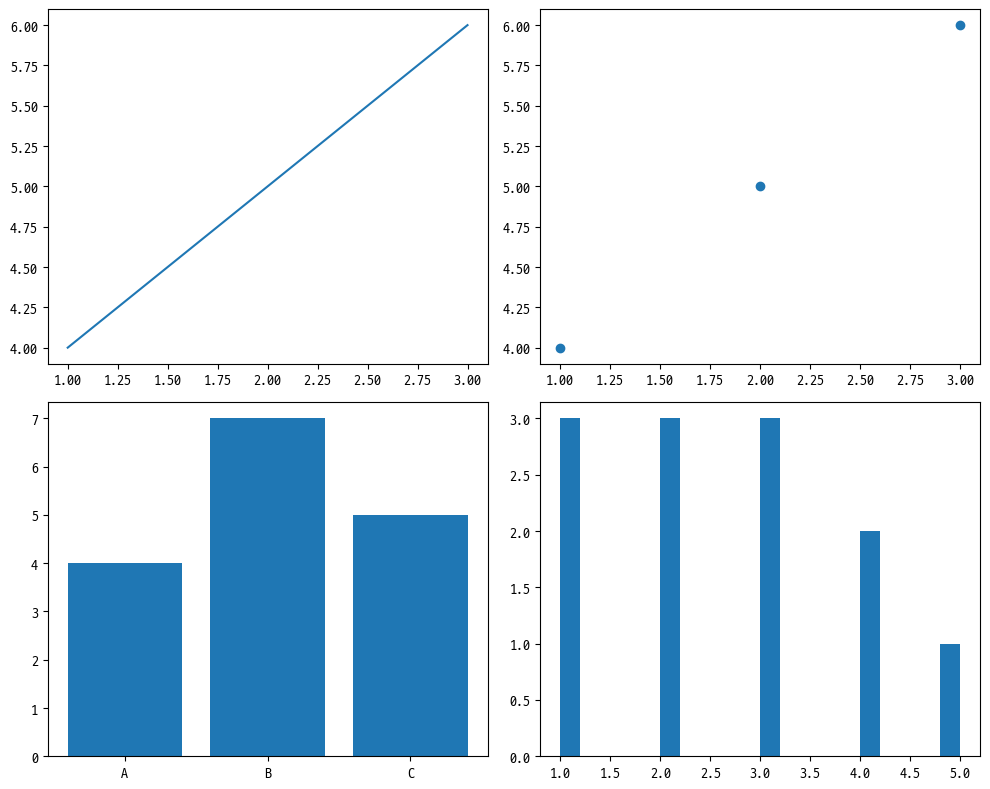

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize = (10, 8)) # 2x2 서브플롯 생성

ax[0,0].plot([1,2,3],[4,5,6])
ax[0,1].scatter([1,2,3],[4,5,6])
ax[1,0].bar(['A','B','C'],[4,7,5])
ax[1,1].hist([1,1,2,2,3,3,4,4,5,1,2,3],bins = 20)

plt.tight_layout()
plt.show()

# 판다스 심화

In [2]:
import numpy as np
import pandas as pd

print("DataFrame: ")
data = {"col1":[2,1,9,8,7,4],"col2":['A','A','B',np.nan,'D','C'],"col3":[0,1,9,4,2,3]}
index = [1,3,2,5,0,4]
df = pd.DataFrame(data, index=index)
df

DataFrame: 


,col1,col2,col3
1,2,A,0
3,1,A,1
2,9,B,9
5,8,NaN,4
0,7,D,2
4,4,C,3


In [6]:
df = df.sort_index(axis=0)
df

,col1,col2,col3
0,7,D,2
1,2,A,0
2,9,B,9
3,1,A,1
4,4,C,3
5,8,NaN,4


In [7]:
df = df.sort_index(axis=1, ascending=False)
df

,col3,col2,col1
0,2,D,7
1,0,A,2
2,9,B,9
3,1,A,1
4,3,C,4
5,4,NaN,8


In [8]:
sorted_df1 = df.sort_values('col1',ascending=True)
sorted_df1

,col3,col2,col1
3,1,A,1
1,0,A,2
4,3,C,4
0,2,D,7
5,4,NaN,8
2,9,B,9


In [9]:
sorted_df2 = df.sort_values(['col2','col1'],ascending=[True, False])
sorted_df2

,col3,col2,col1
1,0,A,2
3,1,A,1
2,9,B,9
4,3,C,4
0,2,D,7
5,4,NaN,8


In [6]:
# x = np.random.randint(1,5,size = (10,5))
# x

# x = np.random.rand(10,5)
# x

# x = np.random.normal(5,3,(10,5)) #평균5, 표준편차3
# x, np.mean(x), np.std(x), x.min(), x.max()

x = np.random.randn(10,5)
x, np.mean(x), np.std(x), x.min(), x.max()

# x = np.array([7,4,1,5,8,0,8,8,2,7,0,7,4,0,5,6,7])
# len(x), np.count_nonzero(x)

# print(np.percentile(x,0))
# print(np.percentile(x,25))
# print(np.percentile(x,50))
# print(np.percentile(x,75))
# print(np.percentile(x,100))

(array([[ 1.93164361, -0.0606032 ,  0.19923679,  1.71837014, -1.31961299],
        [ 1.95260025, -0.75711058,  1.41389307,  0.36834873,  0.38046674],
        [-0.03325349,  0.62508422, -0.5774109 , -2.26549306,  0.11333566],
        [-0.10689585, -1.14319698, -1.07809049,  0.36850156,  0.50906448],
        [ 1.63180671,  0.40820869,  0.94810878, -0.57395635, -0.65586055],
        [ 0.74384694, -0.09755166,  1.05796195, -1.1133308 , -0.1437463 ],
        [-1.13221615,  0.94215047,  0.55005887, -0.53046132, -1.1574251 ],
        [ 0.56636276,  1.27571117,  0.31955868,  0.62497283,  1.44072434],
        [-1.34891736, -0.48878874, -0.17714465,  1.60642998, -0.20837803],
        [-0.89836042,  1.20294842, -1.35153109,  0.32318067, -0.01460727]]),
 np.float64(0.1197726639199667),
 np.float64(0.9808392543743704),
 np.float64(-2.265493055376691),
 np.float64(1.9526002525718562))

In [19]:
import numpy as np
import pandas as pd

data = {
    'Korean' : [50,60,70,30],
    'Math' : [30, np.nan, 40, 20]
}

df = pd.DataFrame(data,['a','b','c','d'])
print(df.index)
print(df.columns)
df

Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['Korean', 'Math'], dtype='object')


,Korean,Math
a,50,30.0
b,60,NaN
c,70,40.0
d,30,20.0


In [20]:
df.count(axis = 0) #행의 갯수

Korean    4
Math      3
dtype: int64

In [21]:
df.count(axis = 1) #열의 갯수

a    2
b    1
c    2
d    2
dtype: int64

In [24]:
print(df.max())
print(df.max(axis=1))
print(df.min())
print(df.min(axis=1))
print(df.sum())
print(df.sum(axis=1))
print(df.mean())
print(df.mean(axis=1, skipna=False))

Korean    70.0
Math      40.0
dtype: float64
a    50.0
b    60.0
c    70.0
d    30.0
dtype: float64
Korean    30.0
Math      20.0
dtype: float64
a    30.0
b    60.0
c    40.0
d    20.0
dtype: float64
Korean    210.0
Math       90.0
dtype: float64
a     80.0
b     60.0
c    110.0
d     50.0
dtype: float64
Korean    52.5
Math      30.0
dtype: float64
a    40.0
b     NaN
c    55.0
d    25.0
dtype: float64


In [26]:
avg = df['Math'].mean()
df['Math'] = df['Math'].fillna(avg)
df

,Korean,Math
a,50,30.0
b,60,30.0
c,70,40.0
d,30,20.0


In [131]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key': ['A','B','C','A','B','C'],
    'data1': [1,2,3,1,2,3],
    'data2': [4,4,6,0,6,1],
    # 'data3': ['안녕','a','b','하세요','pple','anana']
})
df

,key,data1,data2
0,A,1,4
1,B,2,4
2,C,3,6
3,A,1,0
4,B,2,6
5,C,3,1


In [132]:
df.groupby('key').sum()

,data1,data2
key,,
A,2,4
B,4,10
C,6,7


In [133]:
df.groupby(['key','data1']).sum()

,,data2
key,data1,
A,1,4
B,2,10
C,3,7


In [134]:
df.groupby('key').aggregate(['min','median','max'])

data1            data2           
      min median max   min median max
key                                  
A       1    1.0   1     0    2.0   4
B       2    2.0   2     4    5.0   6
C       3    3.0   3     1    3.5   6

In [135]:
df.groupby('key').aggregate({'data1':'max','data2':'sum'})

,data1,data2
key,,
A,1,4
B,2,10
C,3,7


In [124]:
import pandas as pd

file_path = "dataset/청소년정신건강20250304.csv"
ori = pd.read_csv(file_path)
ori = ori.loc[:,'스트레스 인지율':]
ori.columns = ['스트레스', '스트레스 남학생','스트레스 여학생', '우울감 경험율', '우울 남학생', '우울 여학생', '자살 생각율', '자살 남학생', '자살 여학생']
ori.loc[1:] = ori.loc[1:].astype('float64')
ori = ori.loc[1:]
ori.loc[3] = 100 - ori.loc[1]
ori.loc[4] = 100 - ori.loc[2]
ori['응답'] = ['그렇다','그렇다','아니다','아니다']
ori = ori.set_index('응답')
ori

,스트레스,스트레스 남학생,스트레스 여학생,우울감 경험율,우울 남학생,우울 여학생,자살 생각율,자살 남학생,자살 여학생
응답,,,,,,,,,
그렇다,39.6,33.4,46.2,27.5,23.3,32.0,14.5,10.5,18.9
그렇다,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,60.4,66.6,53.8,72.5,76.7,68.0,85.5,89.5,81.1
아니다,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [1]:
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt

fontlist = fm.findSystemFonts(fontpaths=None, fontext = 'ttf')
fontlist

path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)
plt.text(0.3,0.3,'한글')

FileNotFoundError: [Errno 2] No such file or directory: '/home/pkhs/data/C:\\Windows\\Fonts\\NanumGothicLight.ttf'

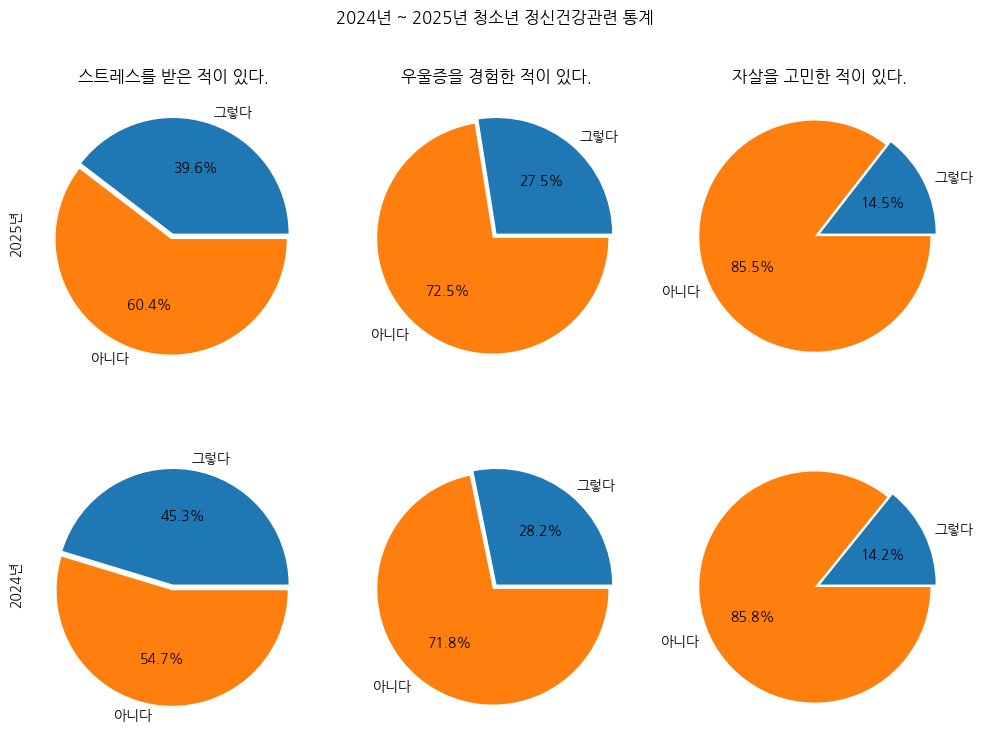

In [125]:
fig, ax = plt.subplots(2,3,figsize = (10,8))
pd.set_option('future.no_silent_downcasting', True)

ori.iloc[:4:2]['스트레스'].plot.pie(explode = [0, 0.05], ax = ax[0][0], autopct = "%.1f%%")
ax[0][0].set_title('스트레스를 받은 적이 있다.')
ax[0][0].set_ylabel('2025년')

ori.iloc[:4:2]['우울감 경험율'].plot.pie(explode = [0, 0.05], ax = ax[0][1], autopct = "%.1f%%")
ax[0][1].set_title('우울증을 경험한 적이 있다.')
ax[0][1].set_ylabel('')

ori.iloc[:4:2]['자살 생각율'].plot.pie(explode = [0, 0.05], ax = ax[0][2], autopct = "%.1f%%")
ax[0][2].set_title('자살을 고민한 적이 있다.')
ax[0][2].set_ylabel('')

ori.iloc[1:4:2]['스트레스'].plot.pie(explode = [0, 0.05], ax = ax[1][0], autopct = "%.1f%%")
ax[1][0].set_ylabel('2024년')

ori.iloc[1:4:2]['우울감 경험율'].plot.pie(explode = [0, 0.05], ax = ax[1][1], autopct = "%.1f%%")
ax[1][1].set_ylabel('')

ori.iloc[1:4:2]['자살 생각율'].plot.pie(explode = [0, 0.05], ax = ax[1][2], autopct = "%.1f%%")
ax[1][2].set_ylabel('')

plt.suptitle('2024년 ~ 2025년 청소년 정신건강관련 통계')
plt.tight_layout()
plt.show()

In [126]:
t = list(range(1,11))
result = []
def is_even(x):
    return True if x % 2 == 0 else False

for i in t:
    if is_even(i):
        result.append(i)

print(result)

[2, 4, 6, 8, 10]


In [130]:
t = list(range(1,11))
result = []
def is_even(x):
    return True if x % 2 == 0 else False

result = filter(is_even,t)
print(list(result))

[2, 4, 6, 8, 10]


In [137]:
df.groupby('key').mean()

,data1,data2
key,,
A,1.0,2.0
B,2.0,5.0
C,3.0,3.5


In [138]:
def filter_mean(x):
    return x['data2'].mean() > 3

df.groupby('key').filter(filter_mean)

,key,data1,data2
1,B,2,4
2,C,3,6
4,B,2,6
5,C,3,1


In [144]:
dfA = df.groupby('key').get_group('A')
dfB = df.groupby('key').get_group('B')
dfC = df.groupby('key').get_group('C')

pd.concat([dfA,dfB,dfC])
# df.ffill()
# df.bfill()

,key,data1,data2
0,A,1,4
3,A,1,0
1,B,2,4
4,B,2,6
2,C,3,6
5,C,3,1


In [150]:
df = pd.DataFrame([
    ['20210901', 'A', 1],
    ['20210901', 'B', 10],
    ['20210901', 'C', 100],
    ['20210902', 'A', 2],
    ['20210902', 'B', 20],
    ['20210902', 'C', 200],
    ['20210903', 'A', 3],
    ['20210903', 'B', 30],
    ['20210903', 'C', 300],
], columns=['date','type','volume'])
df

,date,type,volume
0,20210901,A,1
1,20210901,B,10
2,20210901,C,100
3,20210902,A,2
4,20210902,B,20
5,20210902,C,200
6,20210903,A,3
7,20210903,B,30
8,20210903,C,300


In [151]:
pivot1 = df.pivot(index = "date", columns= 'type', values = 'volume')
pivot1

type,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [152]:
pivot1.columns = pivot1.columns.values
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


In [156]:
pivot1.reset_index(level = 0, inplace = True)
pivot1

,date,A,B,C
0,20210901,1,10,100
1,20210902,2,20,200
2,20210903,3,30,300


In [158]:
pivot1 = pivot1.set_index('date')
pivot1

,A,B,C
date,,,
20210901,1,10,100
20210902,2,20,200
20210903,3,30,300


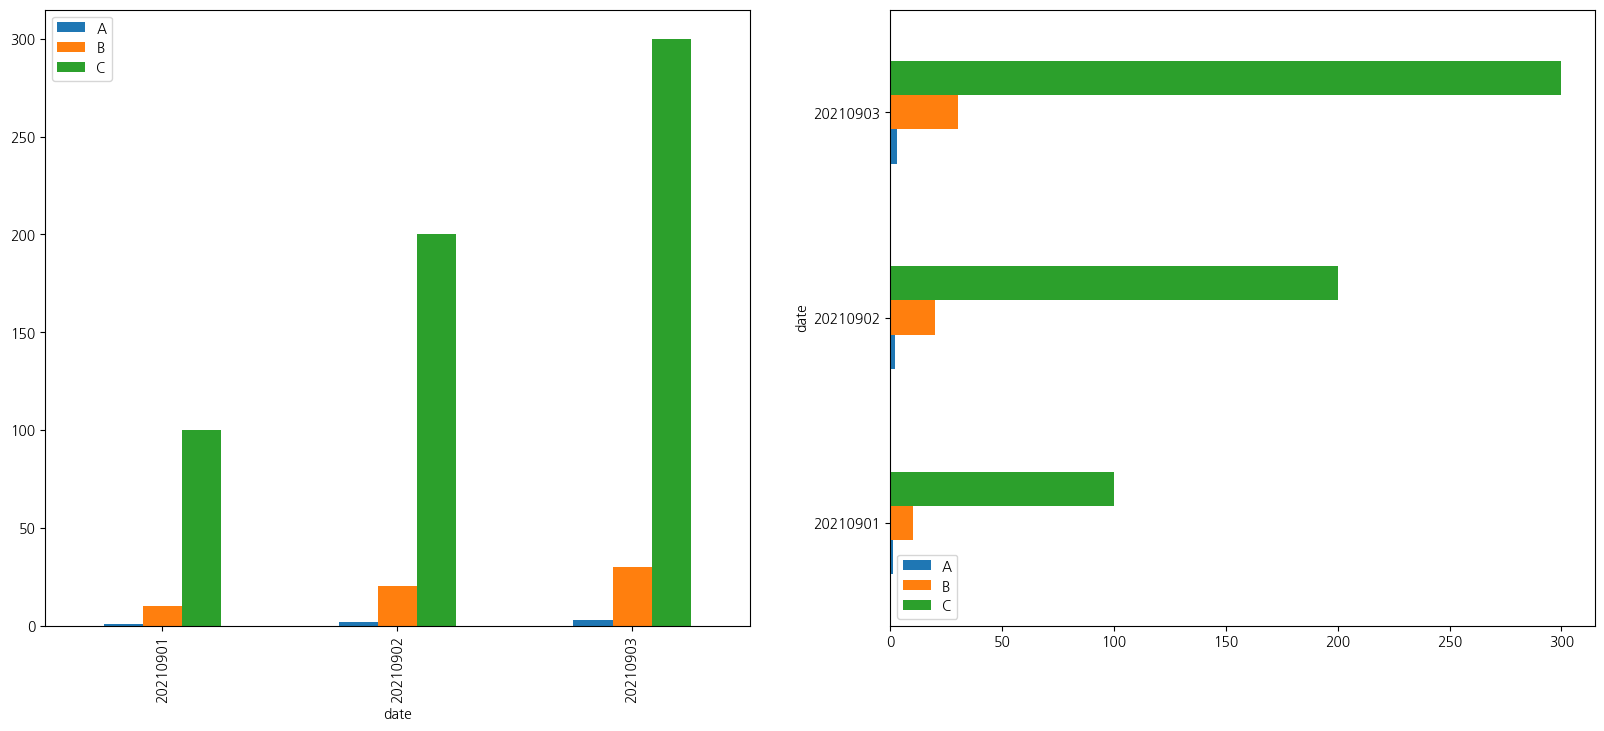

In [160]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
fig.set_size_inches(20,8)
pivot1.plot(kind = 'bar', ax = ax[0])
pivot1.plot(kind = 'barh', ax = ax[1])
plt.show()

In [161]:
import numpy as np
import pandas as pd
df = pd.DataFrame({
    '지역': ['안동','안동','안동','경기','경기','부산','서울','안동'],
    '요일': ['월','월','수','월','화','월','목','금'],
    '강수확률': [80,70,90,10,20,30,40,80],
    '강수량': [80,50,100,200,200,100,50,1000]
})
df

,지역,요일,강수확률,강수량
0,안동,월,80,80
1,안동,월,70,50
2,안동,수,90,100
3,경기,월,10,200
4,경기,화,20,200
5,부산,월,30,100
6,서울,목,40,50
7,안동,금,80,1000


In [164]:
pd.pivot_table(df, index = '요일', columns = '지역', aggfunc=np.max).fillna('')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15424\2066604241.py:1: FutureWarning: The provided callable <function max at 0x0000018232A4AFC0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index = '요일', columns = '지역', aggfunc=np.max).fillna('')


강수량                       강수확률                  
지역     경기     부산    서울      안동    경기    부산    서울    안동
요일                                                    
금                       1000.0                    80.0
목                 50.0                      40.0      
수                        100.0                    90.0
월   200.0  100.0          80.0  10.0  30.0        80.0
화   200.0                       20.0

# 연령별 취업자수 관계

Text(0.3, 0.3, '한글')

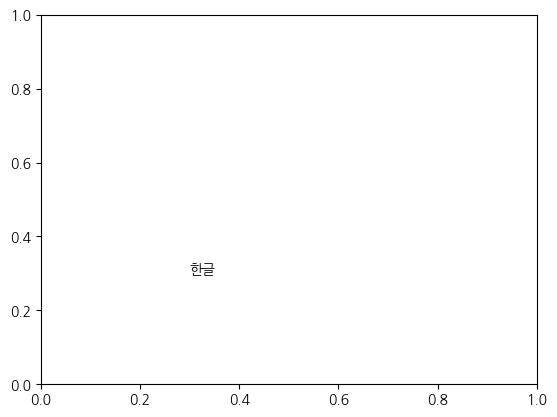

In [1]:
import pandas as pd
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)
plt.text(0.3,0.3,'한글')

In [2]:
ori = pd.read_csv('dataset/행정구역시도성연령별취업자.csv', encoding='EUC-KR')
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [3]:
ex_data = ori.copy()

ex_data.columns = ['resion', 'date', 'age', 'gender', 'value']
ex_data.loc[ex_data['resion'] == '세종특별자치시','value'] = ex_data.loc[ex_data['resion'] == '세종특별자치시','value'].replace('-',0)
ex_data[ex_data['resion'] == '세종특별자치시']['value']
ex_data

,resion,date,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [4]:
ex_data['value'] = ex_data['value'].astype(int)
ex2_data = ex_data.groupby('date')['value'].sum().reset_index(name = "total")
ex2_data

ex3_data = ex_data.groupby(['date','gender'])['value'].sum().reset_index(name = "total")
man_data = ex3_data[ex3_data['gender'] == '남자']
woman_data = ex3_data[ex3_data['gender'] == '여자']

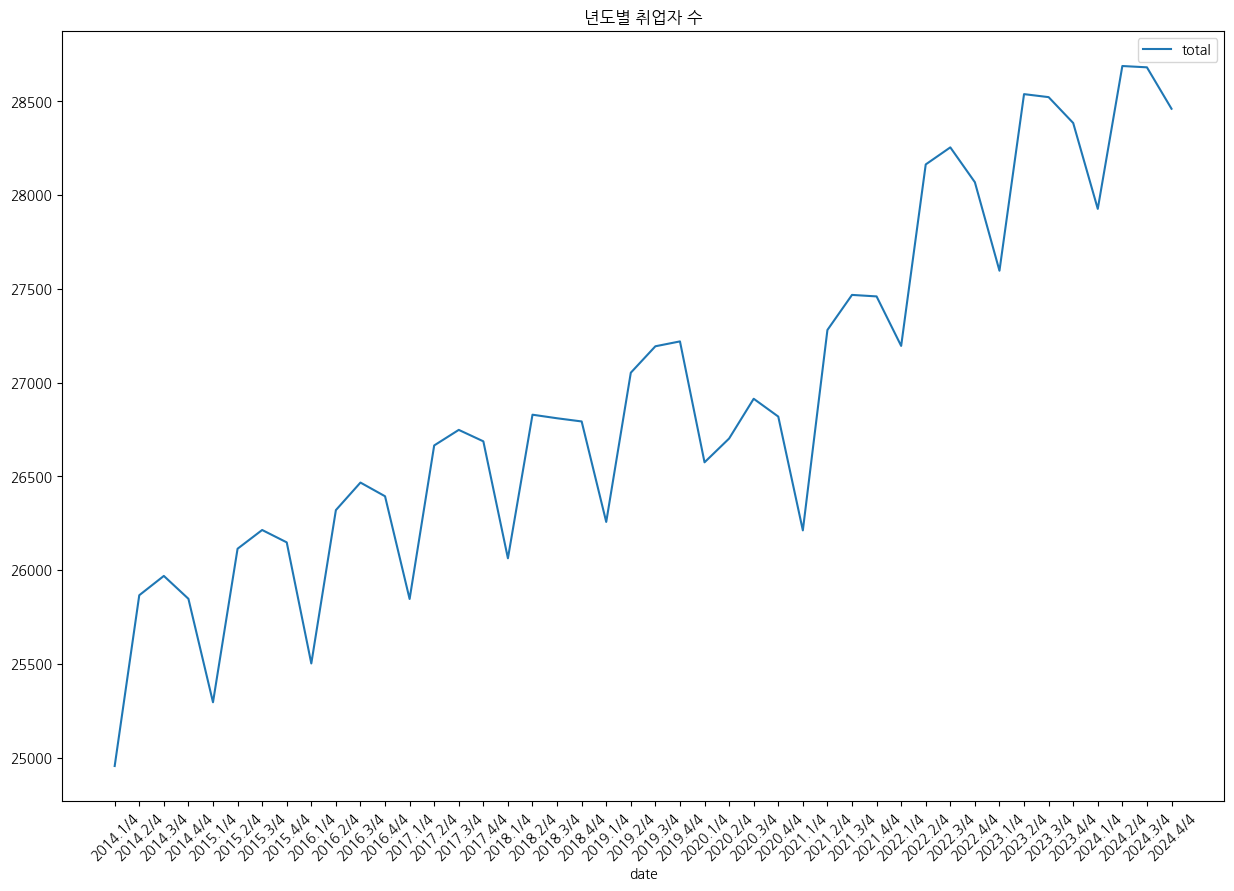

<function matplotlib.pyplot.show(close=None, block=None)>

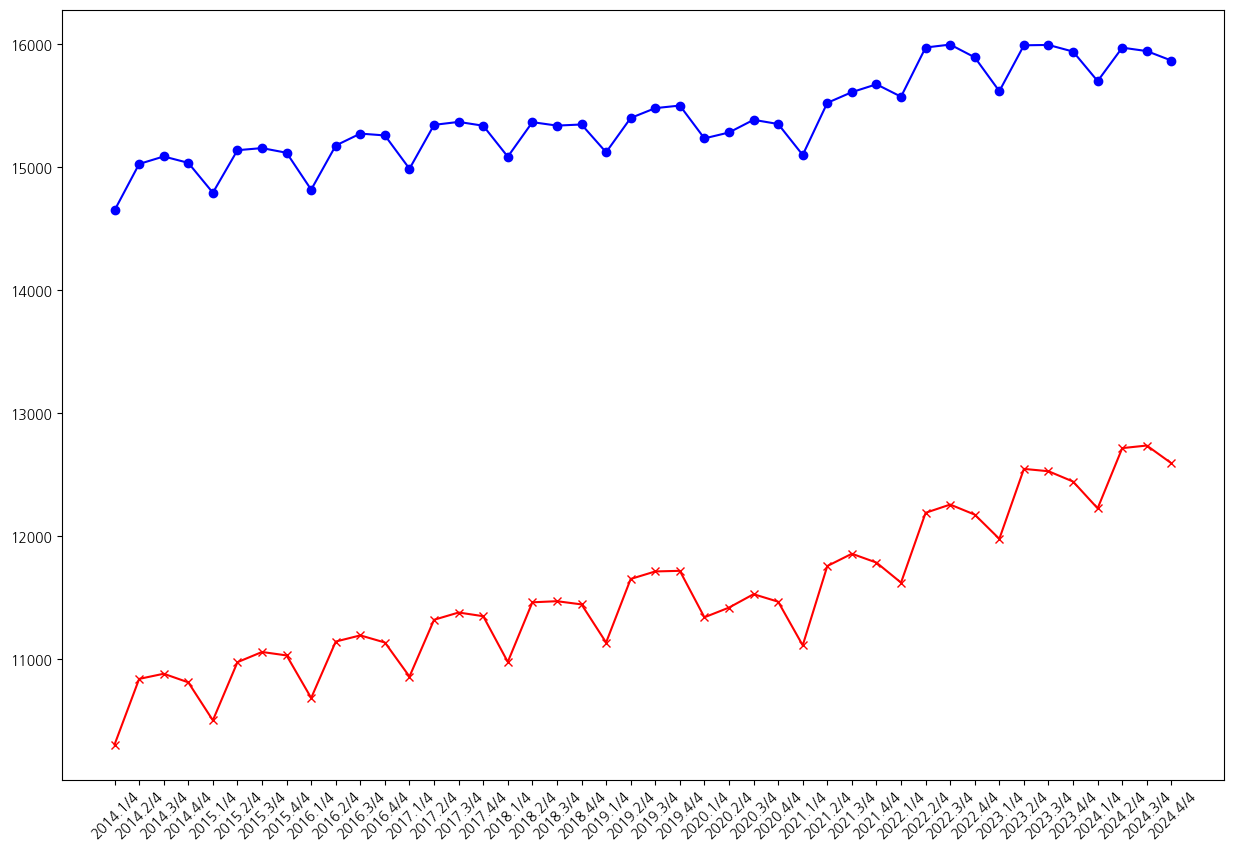

In [5]:
ax = ex2_data.plot(x = 'date', y = 'total', figsize = (15, 10), title = "년도별 취업자 수")
ax.set_xticks(range(len(ex2_data)))
ax.set_xticklabels(ex2_data['date'],rotation = 45)
plt.show()

plt.figure(figsize=(15,10))
plt.plot(man_data['date'], man_data['total'], label = '남자', marker = 'o', color = "blue")
plt.plot(woman_data['date'], woman_data['total'], label = '여자', marker = 'x', color = "red")
plt.xticks(woman_data['date'],rotation = 45)
plt.show



In [6]:
ex3_data = ori.copy()
ex4_data = ori.copy()

ex3_data.loc[:,'데이터'] = ex3_data.loc[:,'데이터'].replace('-',0).astype(int)
ex4_data.loc[:,'데이터'] = ex4_data.loc[:,'데이터'].replace('-',0).astype(int)

filter0 = (ex3_data['시점'] >= "2018.1/4") & (ex3_data['시점'] <= "2018.4/4")
ex3_data = ex3_data[filter0]

In [7]:
#2018
filter1 = ex3_data['연령계층별'].isin(['20 - 29세'])
filter2 = ex3_data['연령계층별'].isin(['60세이상'])

x_data = ex3_data[filter1]
y_data = ex3_data[filter2]

x = x_data.groupby('시도별')['데이터'].sum()
y = y_data.groupby('시도별')['데이터'].sum()
z = ex3_data.groupby('시도별')['데이터'].sum()

z = z.astype(float)

In [77]:
#2024
filter3 = (ex4_data['시점'] >= "2024.1/4") & (ex4_data['시점'] <= "2024.4/4")

x1_data = ex4_data[filter3 & (ex4_data['연령계층별'] == '20 - 29세')]
y1_data = ex4_data[filter3 & (ex4_data['연령계층별'] == '60세이상')]
z1_data = ex4_data[filter3]

x1 = x1_data.groupby('시도별')['데이터'].sum()
y1 = y1_data.groupby('시도별')['데이터'].sum()
z1 = z1_data.groupby('시도별')['데이터'].sum()

z1 = z1.astype(float)

In [78]:
z, z1

(시도별
 강원도         3138.0
 경기도        26883.0
 경상남도        6948.0
 경상북도        5677.0
 광주광역시       2971.0
 대구광역시       4874.0
 대전광역시       3012.0
 부산광역시       6593.0
 서울특별시      20195.0
 세종특별자치시      590.0
 울산광역시       2287.0
 인천광역시       6246.0
 전라남도        3813.0
 전라북도        3645.0
 제주도         1480.0
 충청남도        4677.0
 충청북도        3466.0
 Name: 데이터, dtype: float64,
 시도별
 강원도         3351.0
 경기도        30750.0
 경상남도        6998.0
 경상북도        5828.0
 광주광역시       3083.0
 대구광역시       4844.0
 대전광역시       3136.0
 부산광역시       6723.0
 서울특별시      20814.0
 세종특별자치시      834.0
 울산광역시       2282.0
 인천광역시       6751.0
 전라남도        4004.0
 전라북도        3940.0
 제주도         1594.0
 충청남도        5042.0
 충청북도        3785.0
 Name: 데이터, dtype: float64)

In [79]:
import numpy as np

regions = list(x.index)
color = [np.random.rand(3,) for _ in range(len(regions))]

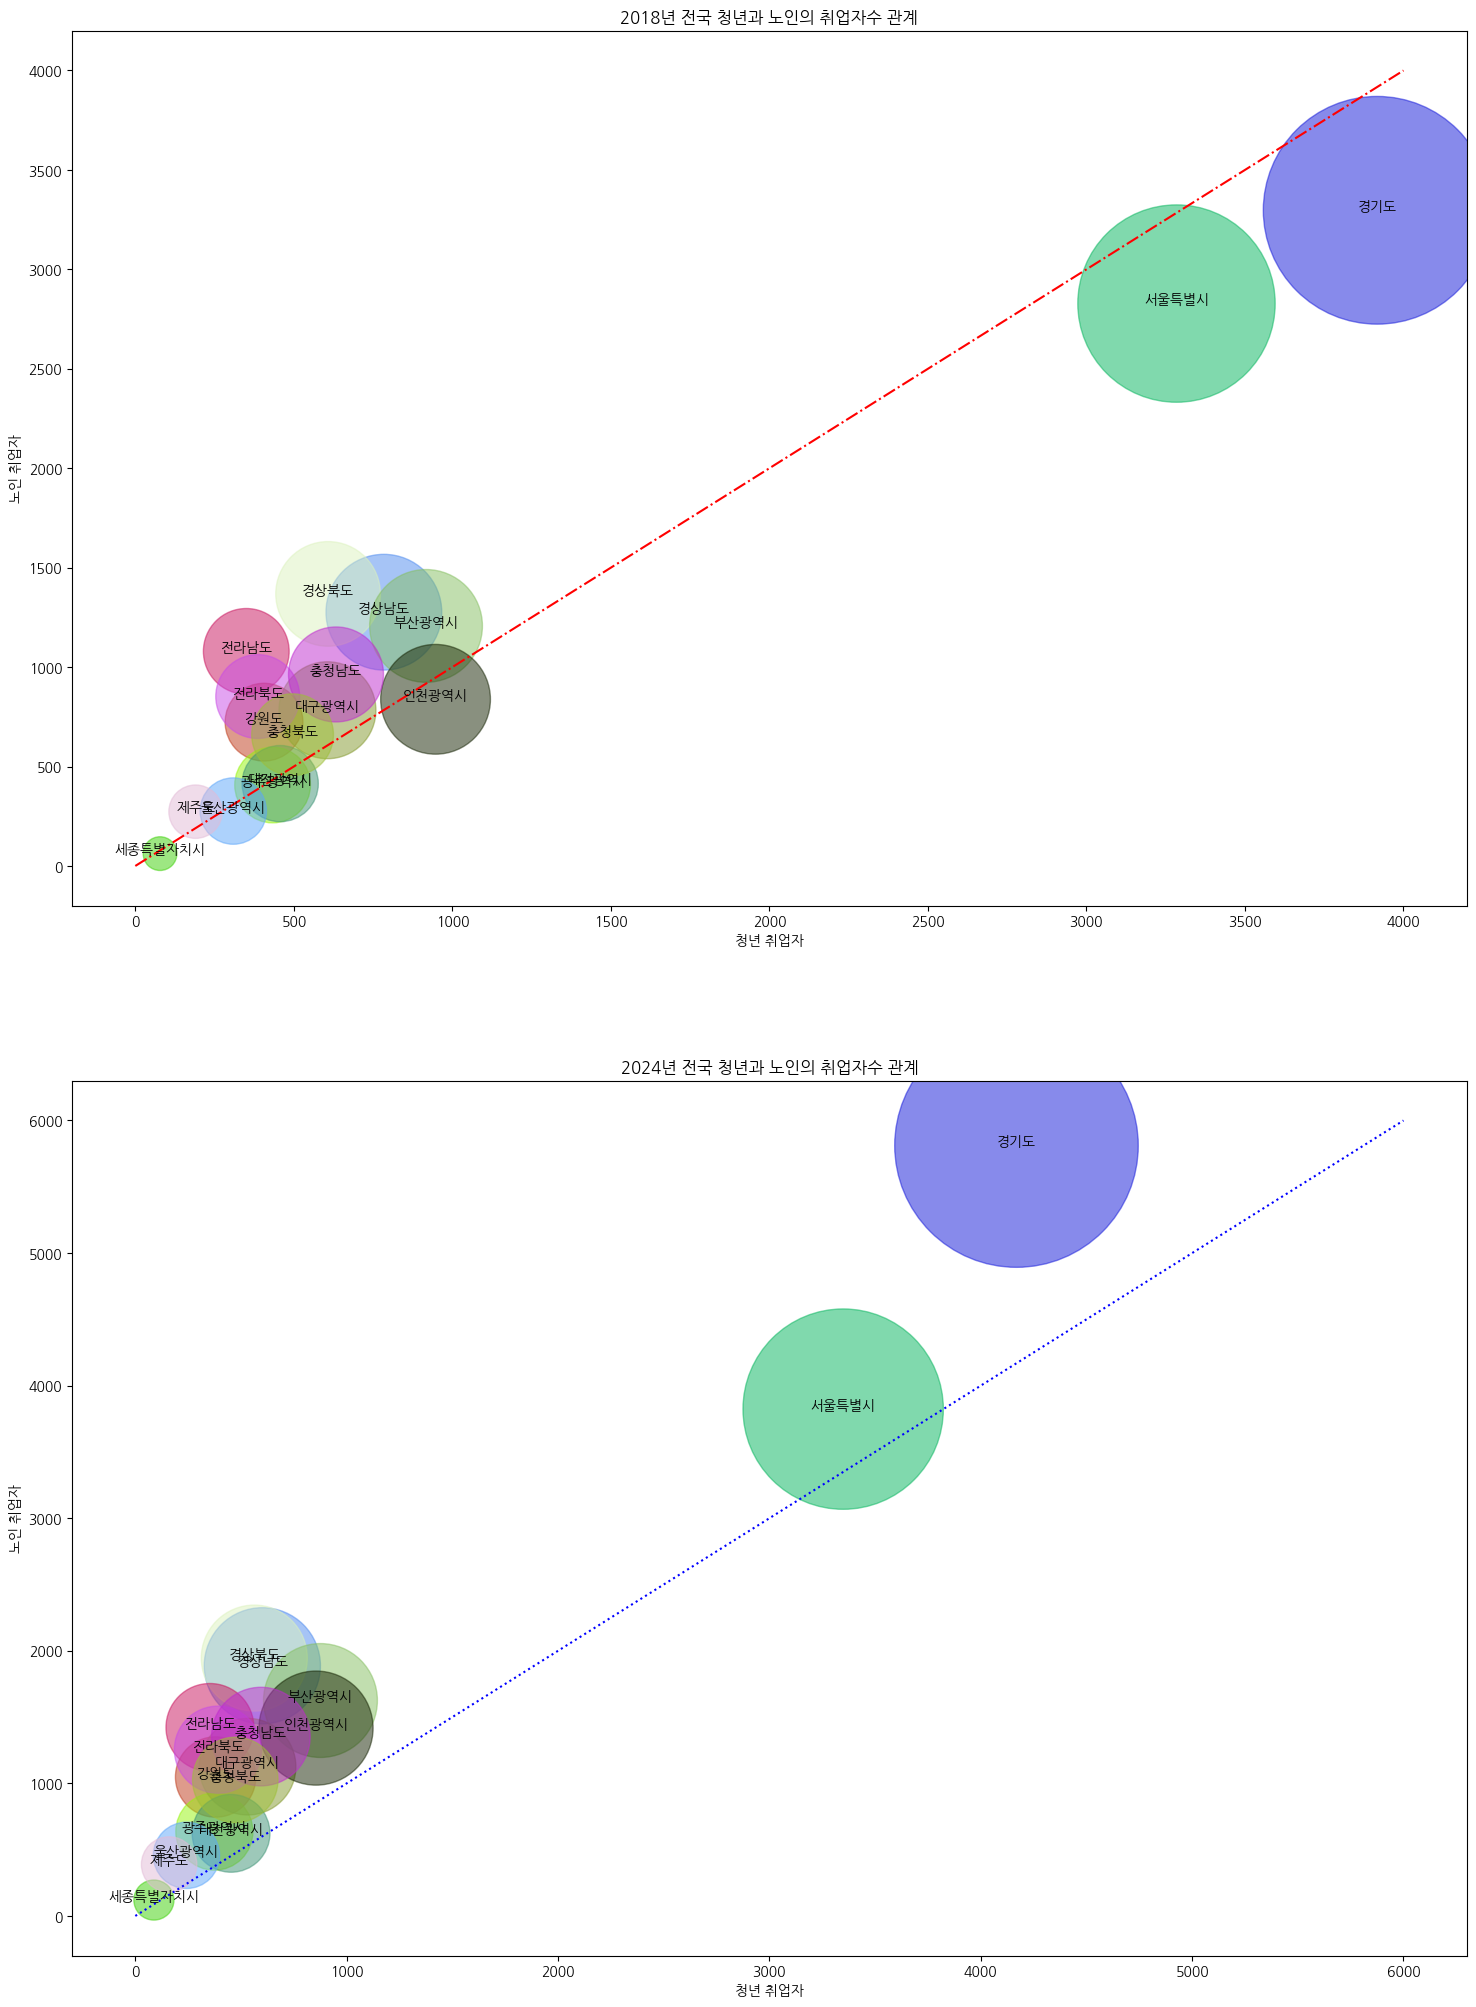

In [80]:
fig, ax = plt.subplots(2,1,figsize=(18,25))

# 2018
ax[0].scatter(x ,y, s = z, c = color, alpha = 0.5)
ax[0].set_title('2018년 전국 청년과 노인의 취업자수 관계')
ax[0].set_xlabel('청년 취업자')
ax[0].set_ylabel('노인 취업자')
for i in range(len(regions)):
    ax[0].annotate(regions[i],xy = (x.iloc[i], y.iloc[i]), ha = 'center')

ax[0].plot([0,4000],[0,4000],color = "red", linestyle = "-.")

# 2024
ax[1].scatter(x1 ,y1 , s = z1, c = color, alpha = 0.5)
ax[1].set_title('2024년 전국 청년과 노인의 취업자수 관계')
ax[1].set_xlabel('청년 취업자')
ax[1].set_ylabel('노인 취업자')
for i in range(len(regions)):
    ax[1].annotate(regions[i],xy = (x1.iloc[i], y1.iloc[i]), ha = 'center')

ax[1].plot([0,6000],[0,6000],color = "blue", linestyle = ":")

plt.show()

13:19:21 - cmdstanpy - INFO - Chain [1] start processing
13:19:22 - cmdstanpy - INFO - Chain [1] done processing


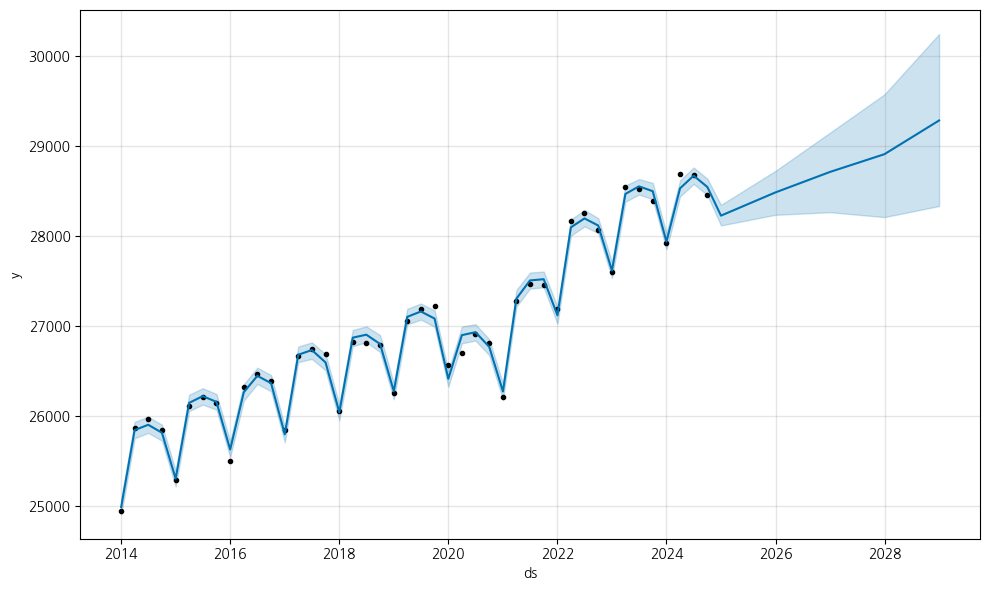

In [87]:
from prophet import Prophet

ex5_data = ori.copy()
ex5_data.loc[:,'데이터'] = ex5_data.loc[:,'데이터'].replace('-',0).astype(int)

예측 = ex5_data.groupby('시점')['데이터'].sum().reset_index(name = "total")
예측 = 예측.rename(columns = {'시점':'ds', 'total':'y'})

for i in range(len(예측['ds'])):
    예측.loc[i,'ds'] = 예측.loc[i,'ds'][:-2].replace('.','-')
    if 예측.loc[i,'ds'][-1] != '1':
        예측.loc[i,'ds'] = 예측.loc[i,'ds'][:-1] + str(int(예측.loc[i,'ds'][-1]) + (2 * i % 8))
    예측.loc[i,'ds'] = 예측.loc[i,'ds'] + '-01'

m = Prophet()
m.fit(예측)

future = m.make_future_dataframe(periods=5, freq='YE') # 10년 후까지의 년도별 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig('취업자수예측.jpg')
plt.show()

In [73]:
예측

,ds,y
0,2014-1-01,24955
1,2014-4-01,25866
2,2014-7-01,25969
3,2014-10-01,25847
4,2015-1-01,25295
5,2015-4-01,26114
6,2015-7-01,26214
7,2015-10-01,26148
8,2016-1-01,25502
9,2016-4-01,26320


In [311]:
ex_data = ori.copy()

ex_data.columns = ['resion', 'date', 'age', 'gender', 'value']
ex_data.loc[ex_data['resion'] == '세종특별자치시','value'] = ex_data.loc[ex_data['resion'] == '세종특별자치시','value'].replace('-',0)
ex_data[ex_data['resion'] == '세종특별자치시']['value']
# ex_data

,resion,date,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


['경기도', '충청남도', '세종특별자치시', '광주광역시', '강원도', '인천광역시', '부산광역시', '전라북도', '울산광역시', '경상북도', '대전광역시', '전라남도', '제주도', '서울특별시', '경상남도', '충청북도', '대구광역시']


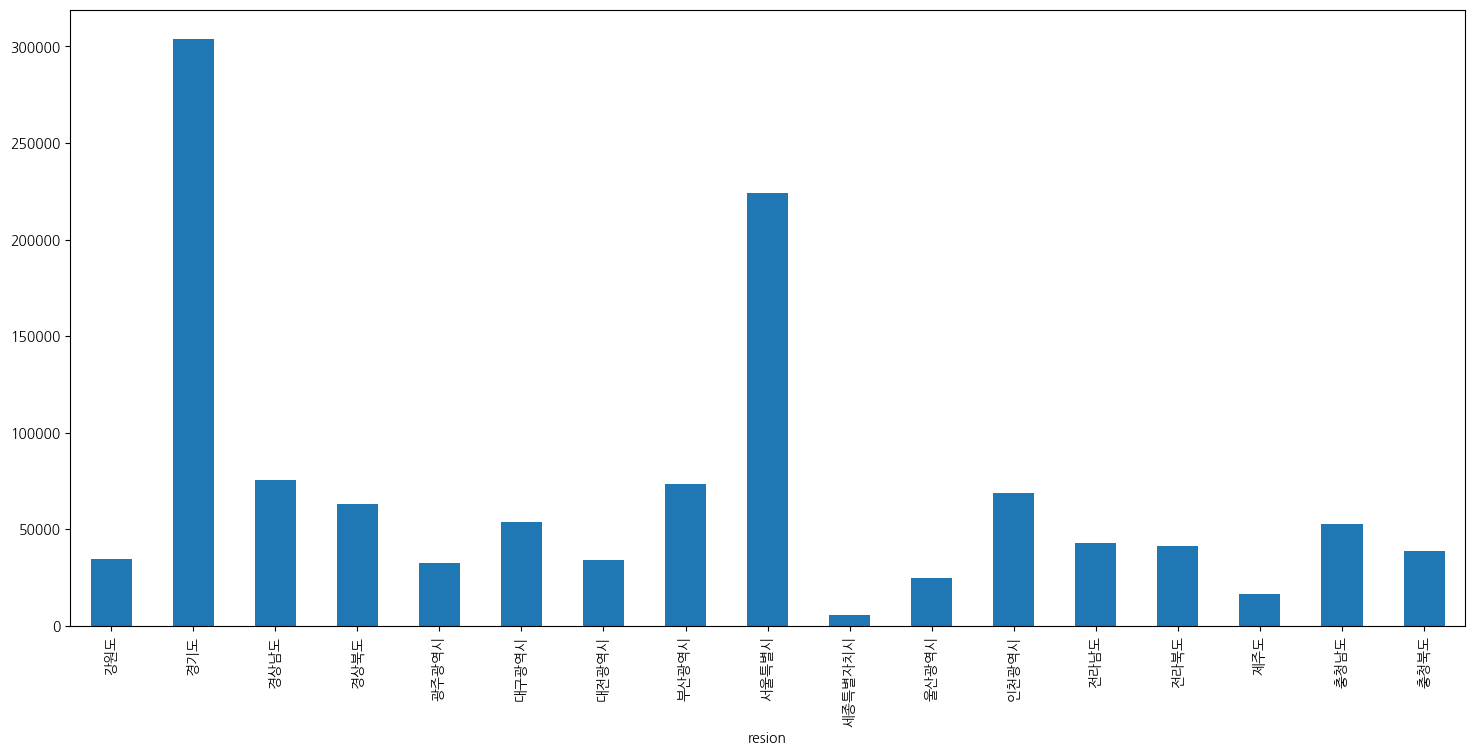

In [326]:
ex_data['value'] = ex_data['value'].astype(int)
resion_data = ex_data.groupby('resion')['value'].sum()
print(list(set(ex_data['resion'])))

resion_data.plot(kind = 'bar',x = 'resion', y = 'value', figsize=(18,8))
plt.show()

# 인천공항 이용자수 분석 및 예측

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from prophet import Prophet

In [107]:
ori = pd.read_csv('dataset/출입국항구내외국인성별국제이동연간20250305.csv', encoding='EUC-KR')

ex1_data = ori.copy()
ex1_data.columns = ["Airport","type1","gender","type2", "year", "value"]
# ex1_data = ex1_data[ex1_data.columns[1:]]
ex2_data = ex1_data[ex1_data['type1'] == '외국인']
외국인입국자 = ex2_data[ex2_data['type2'] == '입국자'].groupby('year')['value'].sum().reset_index(name="total")
외국인출국자 = ex2_data[ex2_data['type2'] == '출국자'].groupby('year')['value'].sum().reset_index(name="total")

내국인입국자 = ex1_data[(ex1_data['type1'] == '내국인') & (ex1_data['type2'] == '입국자')].groupby('year')['value'].sum().reset_index(name = "total")
내국인출국자 = ex1_data[(ex1_data['type1'] == '내국인') & (ex1_data['type2'] == '출국자')].groupby('year')['value'].sum().reset_index(name = "total")

# 외국인 전체 이용객, 외국인, 내국인 비교

외국인이용객 = ex1_data[ex1_data['type1'] == '외국인'].groupby('year')['value'].sum().reset_index(name="total")
내국인이용객 = ex1_data[ex1_data['type1'] == '내국인'].groupby('year')['value'].sum().reset_index(name="total")

년도별총합 = ex1_data.groupby('year')['value'].sum().reset_index(name="total")
년도별총합 = 년도별총합.rename(columns = {'year':'ds', 'total':'y'})

11:35:51 - cmdstanpy - INFO - Chain [1] start processing
11:35:51 - cmdstanpy - INFO - Chain [1] done processing


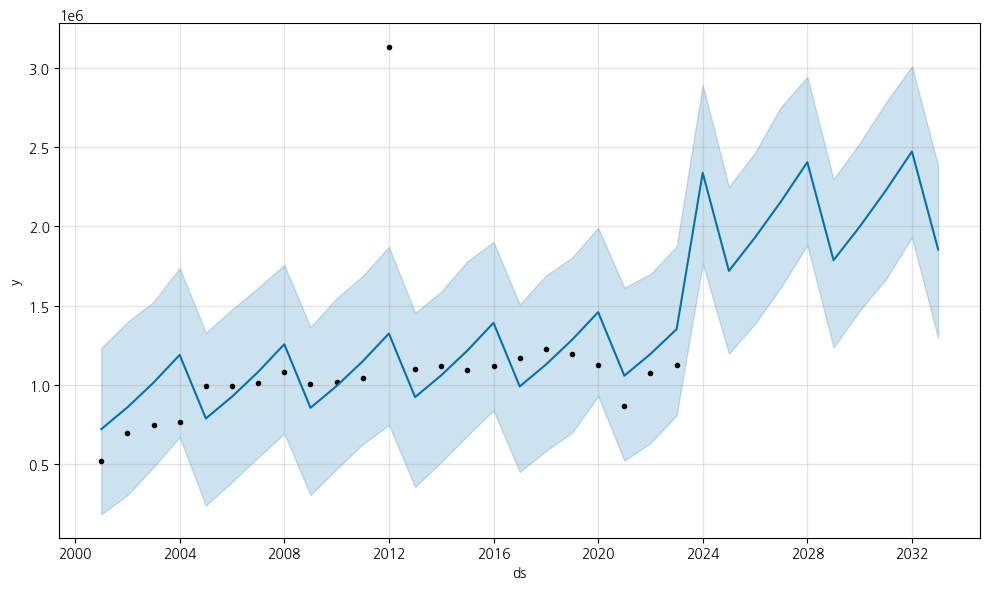

In [109]:
년도별총합['ds'] = pd.to_datetime(년도별총합['ds'], format="%Y")

m = Prophet()
m.fit(년도별총합)

future = m.make_future_dataframe(periods=10, freq='YE') # 10년 후까지의 년도별 데이터 예측
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.show()

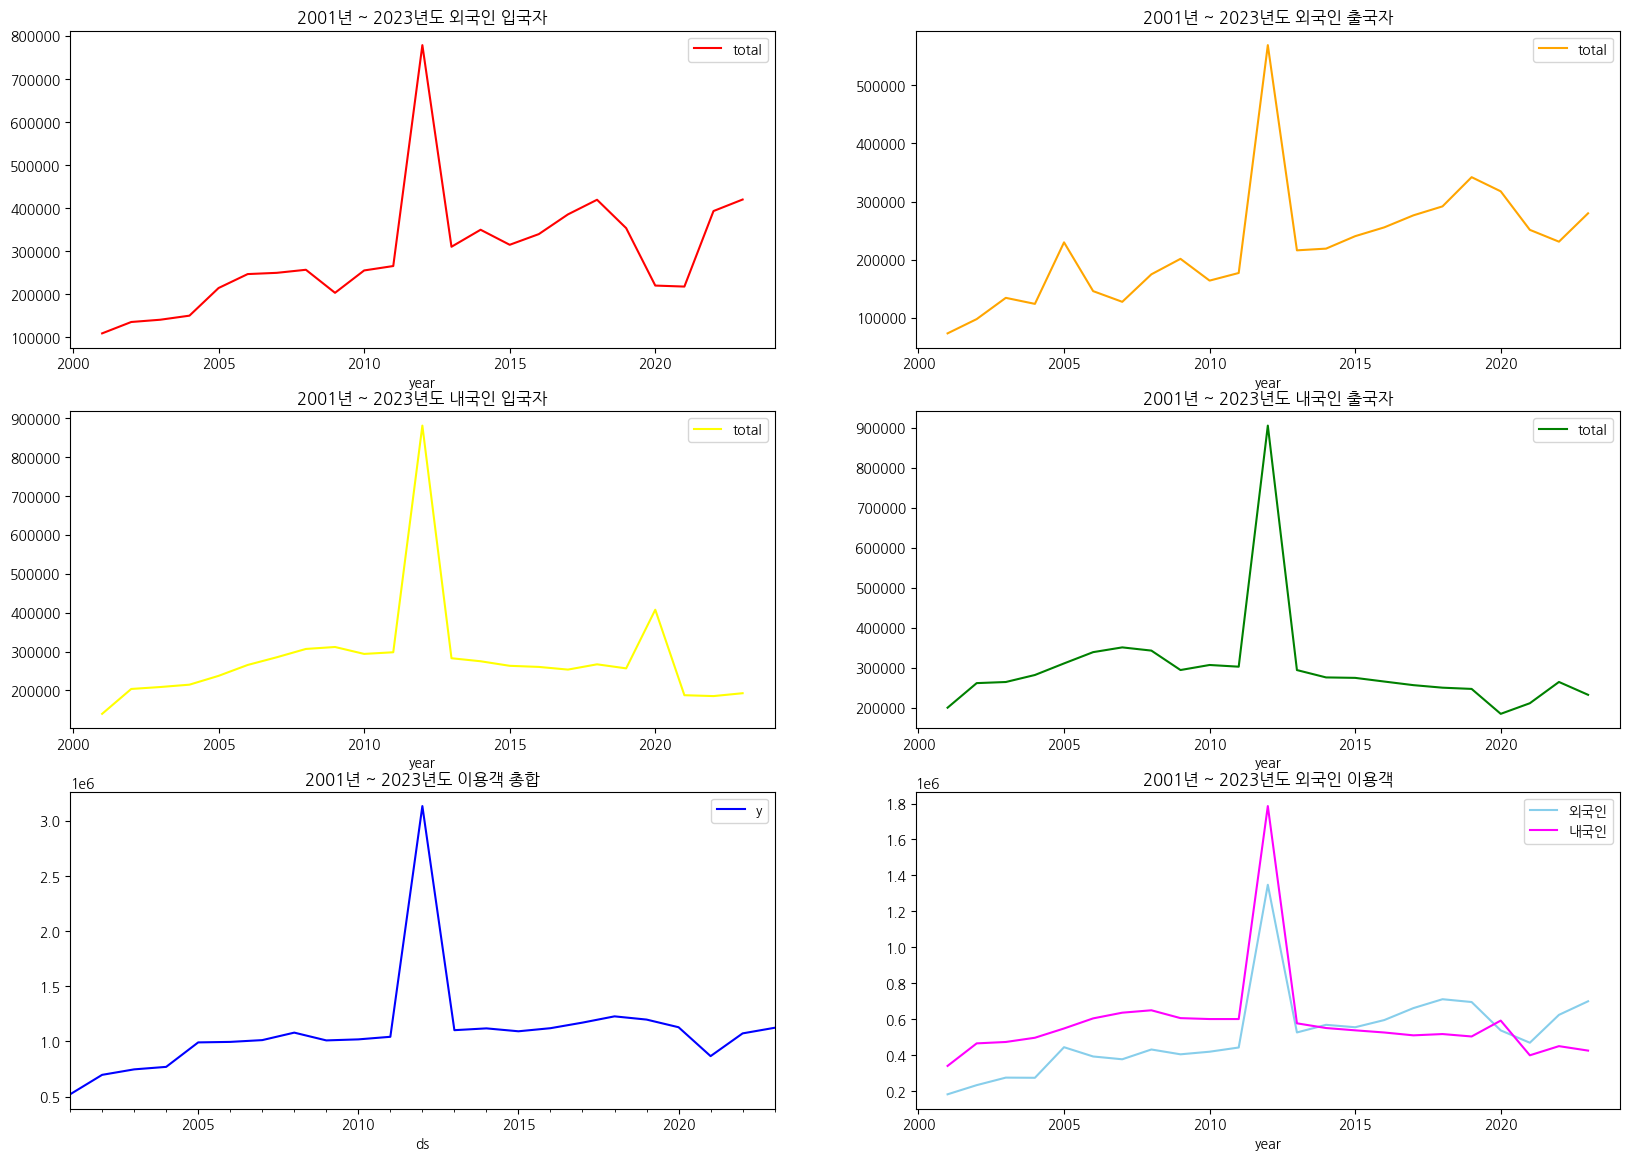

In [122]:
path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family = font_name)

fig, ax = plt.subplots(3,2, figsize = (20,14))
외국인입국자.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 외국인 입국자", ax = ax[0][0], color = "red")
외국인출국자.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 외국인 출국자", ax = ax[0][1], color = "orange")
내국인입국자.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 내국인 입국자", ax = ax[1][0], color = "yellow")
내국인출국자.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 내국인 출국자", ax = ax[1][1], color = "green")
년도별총합.plot(x = 'ds', y = 'y', title = "2001년 ~ 2023년도 이용객 총합", ax = ax[2][0], color = "blue")
외국인이용객.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 외국인 이용객", ax = ax[2][1], label = "외국인", color = "skyblue")
내국인이용객.plot(x = 'year', y = 'total', title = "2001년 ~ 2023년도 외국인 이용객", ax = ax[2][1], label = "내국인", color = "magenta")
plt.show()

# 데이터 시각화 (Matplotlib)

<function matplotlib.pyplot.show(close=None, block=None)>

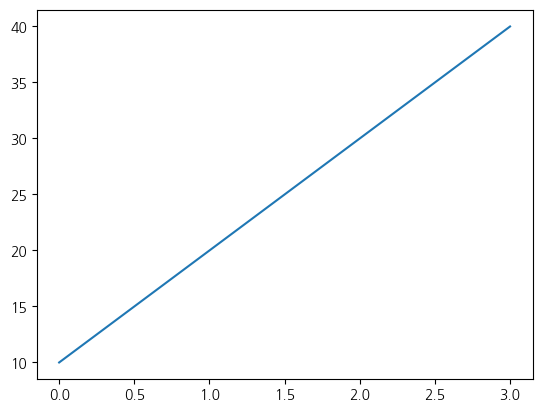

In [88]:
plt.plot([10,20,30,40])
plt.show

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


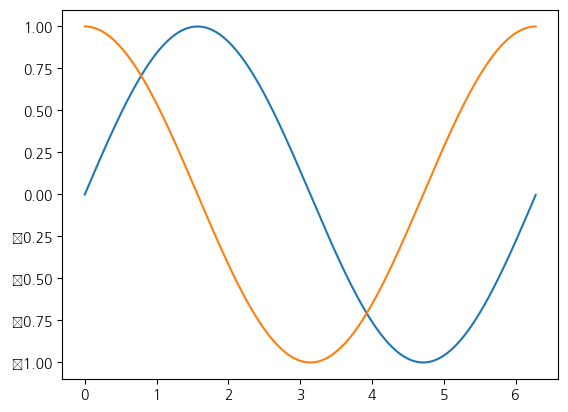

In [91]:
x = np.arange(0,2*np.pi,0.01)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.show()

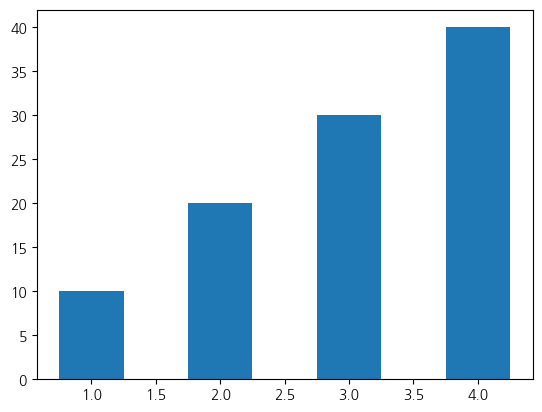

In [94]:
plt.bar([1,2,3,4],[10,20,30,40], width=0.5)
plt.show()

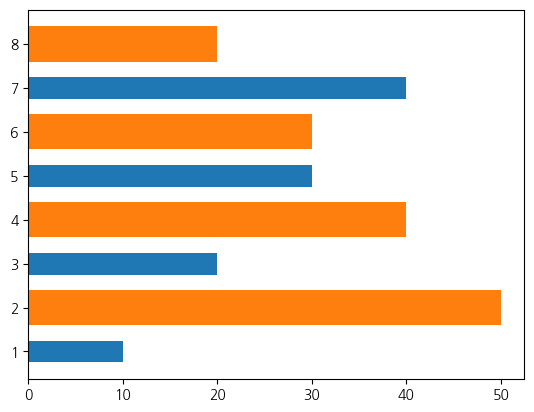

In [100]:
plt.barh(range(1,8,2),[10,20,30,40], height=0.5)
plt.barh(range(2,9,2),[50,40,30,20])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

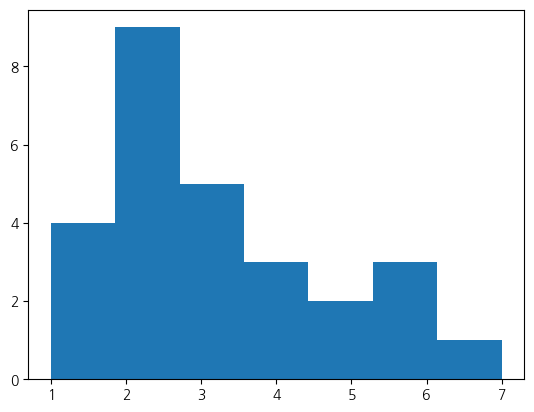

In [106]:
plt.hist([1,2,3,4,1,2,3,3,2,2,2,1,1,5,5,6,6,7,4,2,2,4,6,3,2,2,3],bins=7)
plt.show

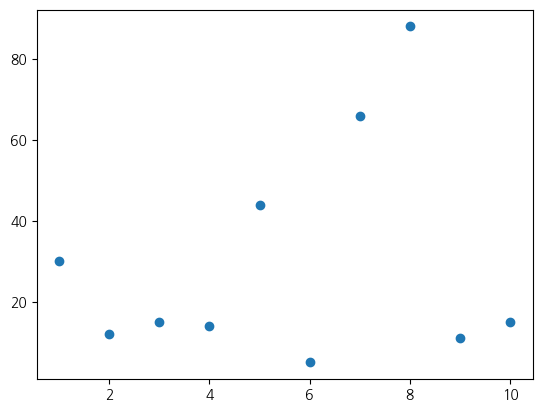

In [107]:
plt.scatter(range(1,11),[30,12,15,14,44,5,66,88,11,15])
plt.show()

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


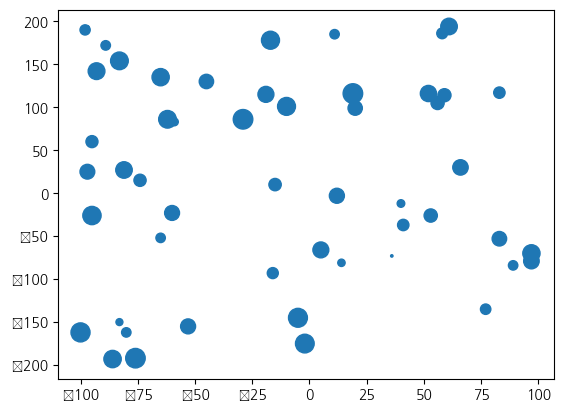

In [109]:
x = np.random.randint(-100,100,100)
y = np.random.randint(-200,200,100)
size = np.random.randint(-200,200,100)
plt.scatter(x,y,s = size)
plt.show()

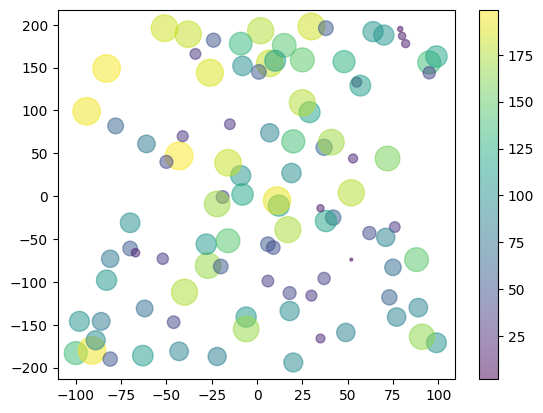

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randint(-100,100,100)
y = np.random.randint(-200,200,100)
z = np.random.randint(0,200,100)
plt.scatter(x,y,s = z * 2, c = z, alpha=0.5)
plt.colorbar()
plt.show()

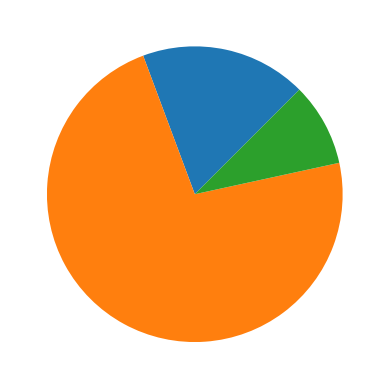

In [115]:
plt.pie([20,80,10], startangle=45)
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


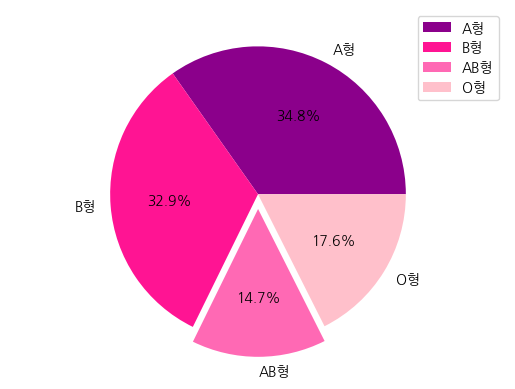

In [122]:
size = [2441, 2312, 1031, 1233]
label = ['A형', 'B형', 'AB형', 'O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']
plt.axis('equal')
plt.pie(size, labels = label, autopct = '%.1f%%', explode = (0,0,0.1,0), colors = color)
plt.legend()
plt.show()

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #리눅스용

# 윈도우용
# path = 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'
# font_name = fm.FontProperties(fname=path).get_name()
# matplotlib.rc('font', family = font_name)

Text(0.5, 0.5, '한글')

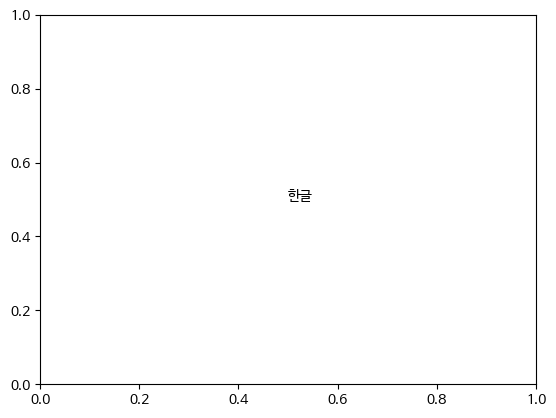

In [3]:
plt.text(0.5,0.5,'한글')

# 방범용 CCTV 위치와 인구 데이터 분석
- https://data.busan.go.kr/bdip/opendata/detail.do?publicdatapk=15082060&searchKeyword=%EB%B0%A9%EB%B2%94%EC%9A%A9%20CCTV&searchOption=OR&from=dsh&uuid=2774e105-081a-4b90-aa4c-e80bcd0963fe#n
- CCTV 수 파악 및 인구대비 CCTV 비율 파악
- 인구대비 CCTV의 평균치 확인, CCTV 부족 구역 확인

In [ ]:
import pandas as pd

raw = pd.read_csv('dataset/부산방범용CCTV 정보20230622.csv', encoding = 'EUC-KR')
raw

In [108]:
# raw.columns =} ['x','xx','local']
raw = raw.rename(columns = {"CCTV 그룹":'local'})['local']

In [ ]:
cctv = raw.apply(lambda x : x.split('-')[0])
cctv = cctv.value_counts()
cctv = cctv.reset_index()
cctv

# locallist = []
# for v in raw:
#     locallist.append(v.split('-')[0])

# cctv = pd.Series(locallist)
# cctv.value_counts()

# raw = raw.str.extract(r"(\D+)-")[0]
# raw

## 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do

In [ ]:

cctv

In [ ]:
import pandas as pd
ori = pd.read_excel('dataset/202306연령별인구현황월간.xlsx',sheet_name="연령별인구현황",skiprows = 3)
data = ori[['행정기관','총 인구수']]
data.columns = ['local', 'population']
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x : x.split(' ')[1])
data = data.reset_index(drop = True)
data['local'][4] = data['local'][4].replace('부산','')

data = data.sort_values(by='local').reset_index(drop = True)
cctv = cctv.sort_values(by='local').reset_index(drop = True)

total = pd.concat([data,cctv],axis = 1)
total.columns= ['local','population','x','count']
total['population'] = total['population'].apply(lambda x : int(x.replace(',','')))
total = total.drop(columns = 'x')
total = total.sort_values(by='population', ascending = False)
total

In [112]:
# data['local'] = data['local'].apply(lambda x: x.replace("구","").replace("군","").strip() if len(x) > 3 else x.strip())
# total = pd.merge(cctv,data, on = 'local')

In [113]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')

In [ ]:
total = total.set_index('local')
total['count'].sort_values().plot(kind = "barh", grid = True, y = 'local', ylabel = "구")
plt.title('CCTV 구별 데이터')
plt.xlabel("CCTV 설치대 수")
plt.show()

In [ ]:
import numpy as np

fp1 = np.polyfit(total['population'],total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)

size = total['population'] / total['count']

total['err'] = np.abs(total['count'] - f1(total['population'])) # 오차

plt.figure(figsize = (18,9))

plt.scatter(total['population'],total['count'], s = size, alpha = 0.5, c = total['err'])

plt.plot(fx,f1(fx), ls = 'dashed', lw = 3, color = 'magenta')

for n in range(len(total['population'])):
    plt.text(total['population'][n],total['count'][n] * 0.9989,total.index[n], fontsize = 10, ha = 'center')
    
plt.xlabel('population')
plt.ylabel('CCTV')
plt.colorbar()
plt.grid()
plt.show()

# 공간정보
- 브이월드 공간정보 다운로드 국토부
- https://www.vworld.kr/dtmk/dtmk_ntads_s001.do

Text(0.5, 0.5, '한글')

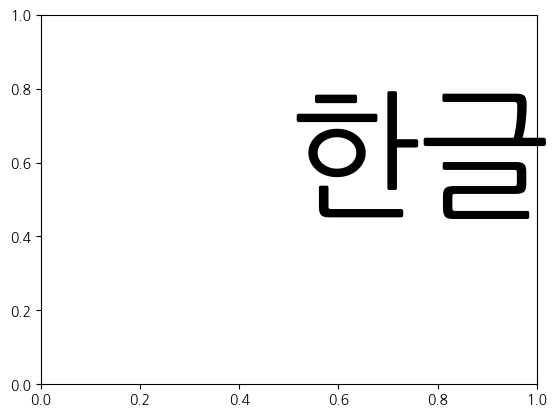

In [9]:
import matplotlib.pyplot as plt

plt.rc('font', family = "NanumGothic")
plt.text(0.5,0.5, '한글', size = 100)

In [2]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 10.2 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


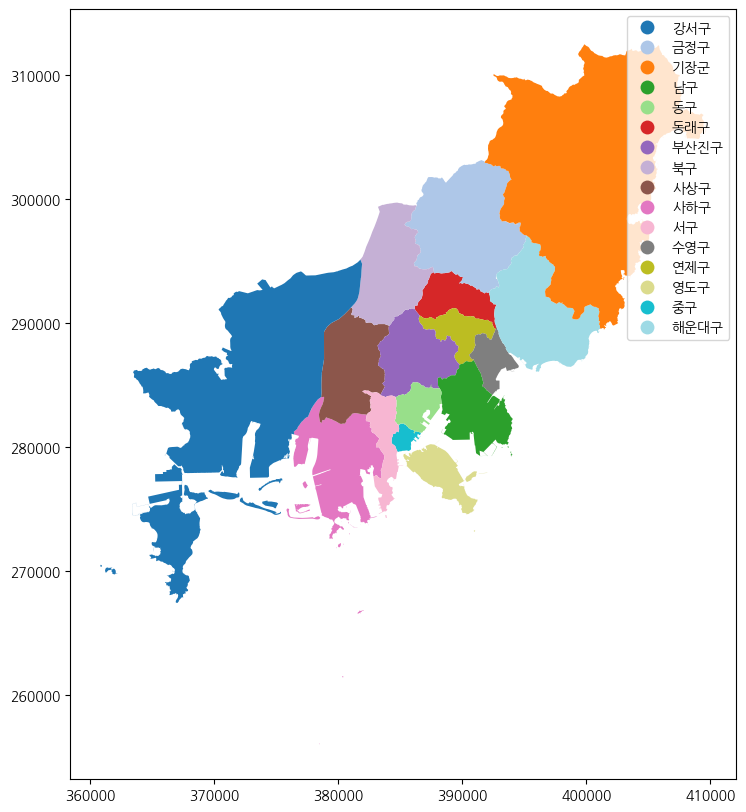

In [10]:
import geopandas as gpd

shp_path = "../data/dataset/LARD_ADM_SECT_SGG_26_202502.shp"
gdf = gpd.read_file(shp_path, encoding = "EUC-KR")

fig, ax = plt.subplots(1,1,figsize = (10,10))
gdf.plot(column = "SGG_NM", ax = ax, legend = True, cmap = 'tab20')
plt.show()

In [19]:
file_path = "dataset/전국교통사고다발지역표준데이터.csv"
ori = pd.read_csv(file_path, encoding = 'EUC_KR')
ori[['사고다발지역폴리곤정보','사고다발지역시도시군구']]

,사고다발지역폴리곤정보,사고다발지역시도시군구
0,"{type:Polygon,coordinates:[[[127.45888288,36.6...",충북 청주흥덕1
1,"{type:Polygon,coordinates:[[[126.46297567,36.7...",충남 서산1
2,"{type:Polygon,coordinates:[[[127.14355147,36.8...",충남 천안서북1
3,"{type:Polygon,coordinates:[[[127.14349966,36.8...",충남 천안서북2
4,"{type:Polygon,coordinates:[[[127.14275156,36.8...",충남 천안서북3
...,...,...
14473,"{type:Polygon,coordinates:[[[127.1478646,37.49...",서울특별시 송파구10
14474,"{type:Polygon,coordinates:[[[127.1009533,37.51...",서울특별시 송파구11
14475,"{type:Polygon,coordinates:[[[127.0866148,37.50...",서울특별시 송파구12
14476,"{type:Polygon,coordinates:[[[127.1376285,37.49...",서울특별시 송파구13


In [14]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install ipython

Defaulting to user installation because normal site-packages is not writeable


# 시각화 모듈 시본 seaborn (팁문화분석)

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.get_dataset_names()
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


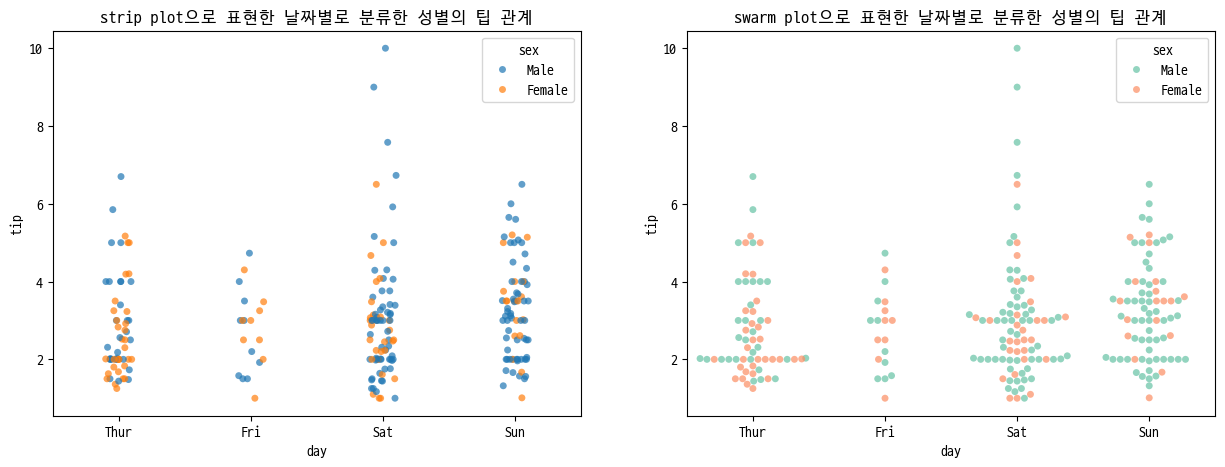

In [39]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x = 'day', y = 'tip', hue = 'sex', data = tips, alpha = 0.7, ax = ax1)
sns.swarmplot(x = 'day', y = 'tip', hue = 'sex', data = tips, alpha = 0.7, ax = ax2, palette = 'Set2')
ax1.set_title('strip plot으로 표현한 날짜별로 분류한 성별의 팁 관계')
ax2.set_title('swarm plot으로 표현한 날짜별로 분류한 성별의 팁 관계')
plt.show()

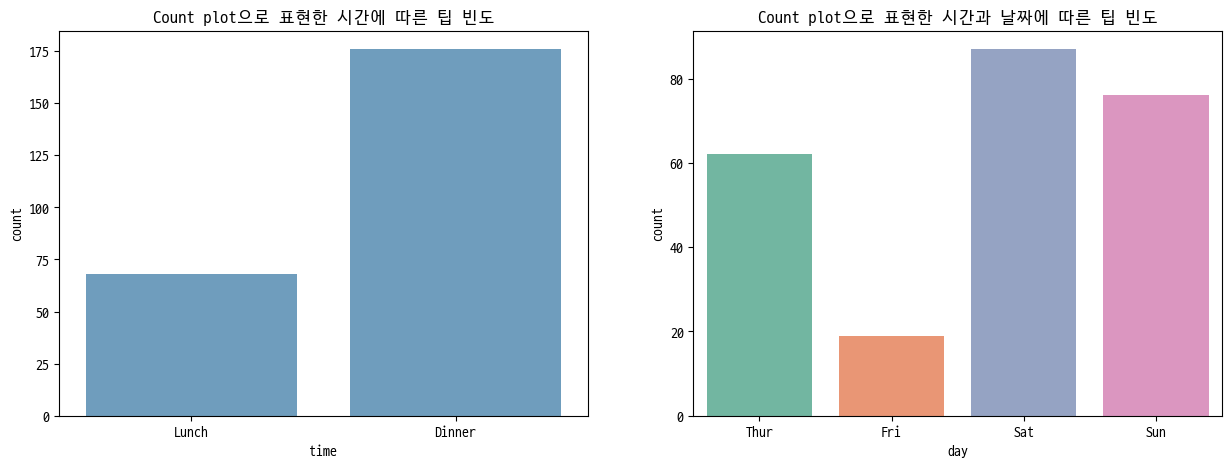

In [42]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(x = 'time', data = tips, alpha = 0.7, ax = ax1)
sns.countplot(x = 'day', hue = 'day', data = tips, palette = 'Set2', ax = ax2)
ax1.set_title('Count plot으로 표현한 시간에 따른 팁 빈도')
ax2.set_title('Count plot으로 표현한 시간과 날짜에 따른 팁 빈도')
plt.show()

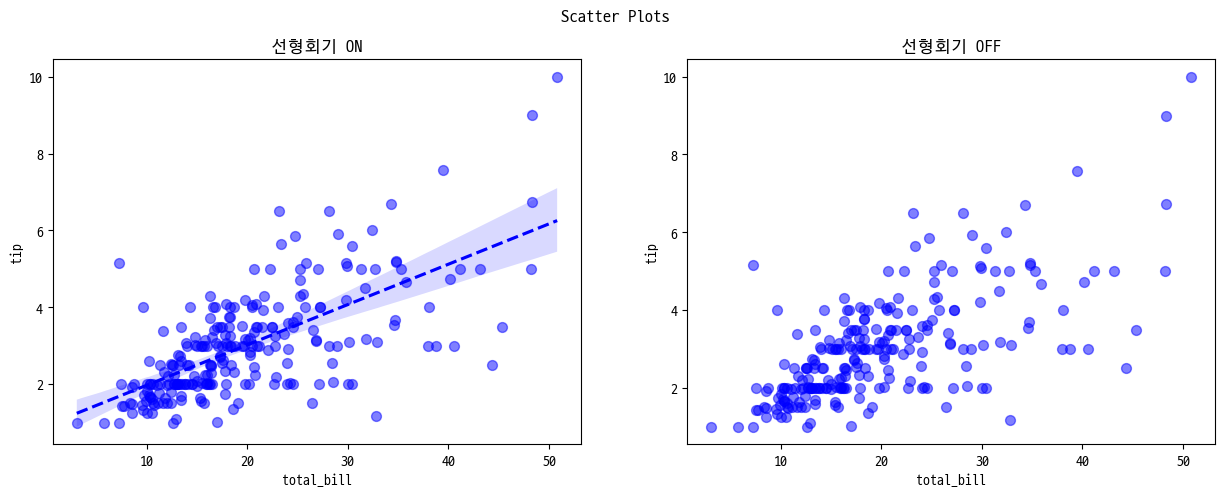

In [48]:
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x = 'total_bill', y = 'tip', data = tips, color = 'blue', scatter_kws = {'s' : 50, 'alpha':0.5}, line_kws = {"linestyle" : "--"}, ax = ax1)
sns.regplot(x = 'total_bill', y = 'tip', data = tips, color = 'blue', scatter_kws = {'s' : 50, 'alpha':0.5}, fit_reg = False, ax = ax2)

fig.suptitle('Scatter Plots')
ax1.set_title('선형회기 ON')
ax2.set_title('선형회기 OFF')
plt.show()

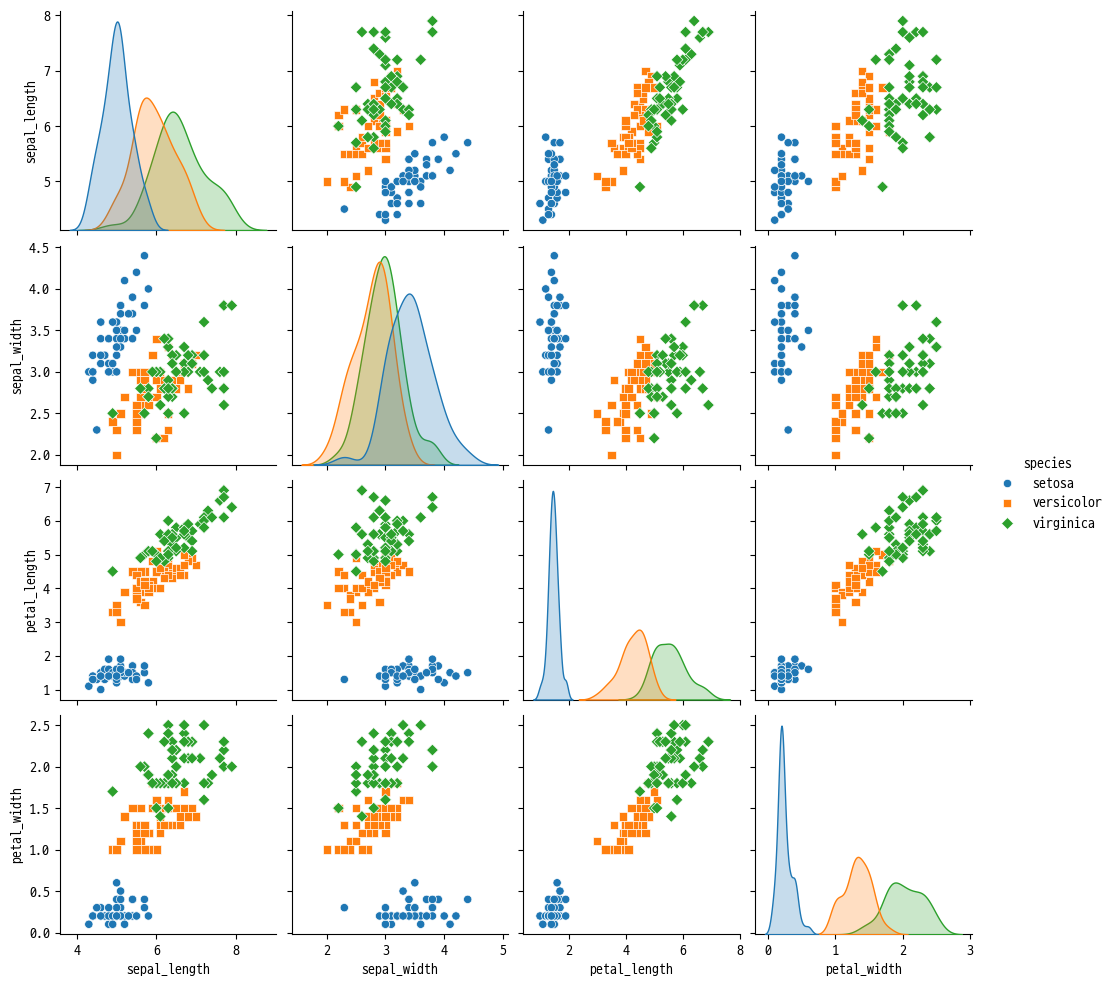

In [50]:
iris = sns.load_dataset('iris')

sns.pairplot(data = iris, hue = 'species', markers = ['o','s','D'])
plt.show()

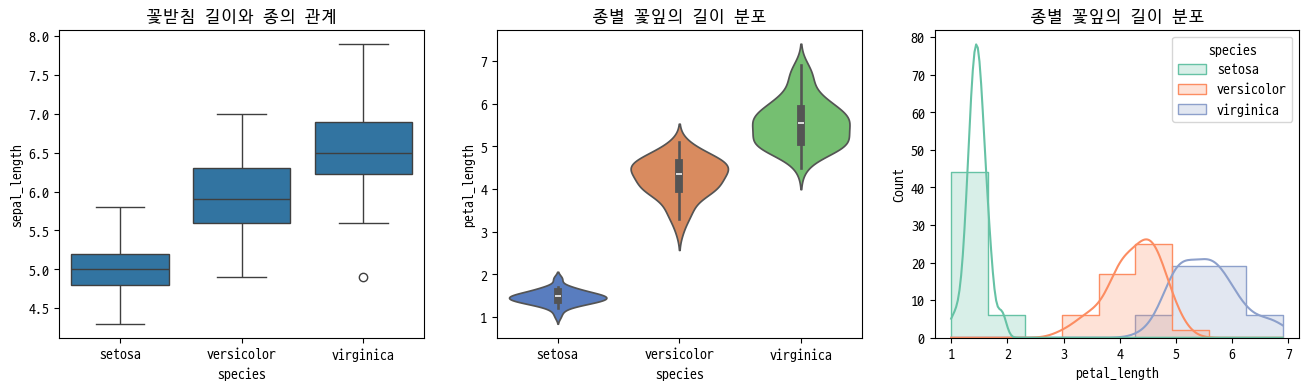

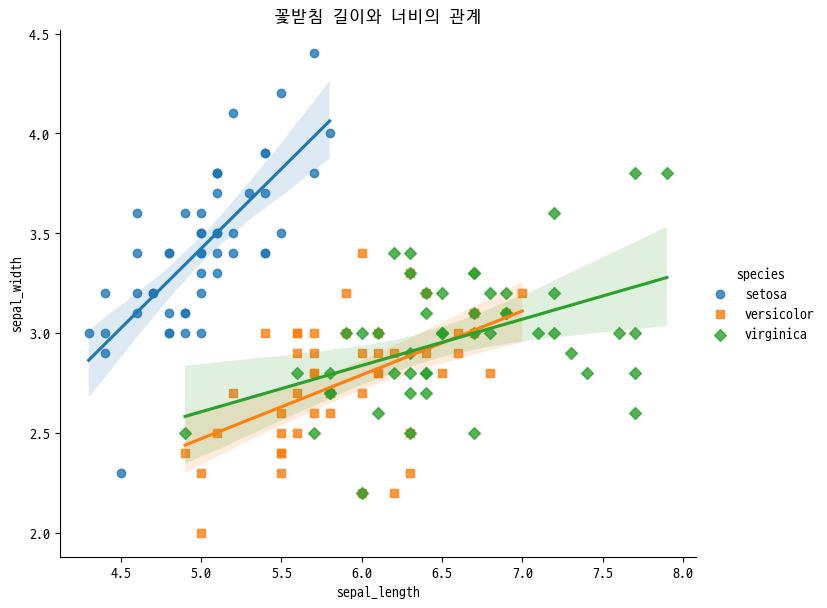

In [69]:
fig = plt.figure(figsize = (16,4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(x = 'species', y = 'sepal_length', data = iris, ax = ax1)
sns.violinplot(x = 'species', y = 'petal_length', data = iris, hue = 'species', palette = 'muted', ax = ax2)
sns.histplot(x = "petal_length", data = iris, hue = "species", kde = True, element = "step", palette = "Set2", ax = ax3)

ax1.set_title('꽃받침 길이와 종의 관계')
ax2.set_title('종별 꽃잎의 길이 분포')
ax3.set_title('종별 꽃잎의 길이 분포')

sns.lmplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = iris, markers = ['o', 's', 'D'], height = 6, aspect = 1.2)
plt.title('꽃받침 길이와 너비의 관계')

plt.show()

In [71]:
exercise = sns.load_dataset('exercise')
exercise.sample(5)

,Unnamed: 0,id,diet,pulse,time,kind
25,25,9,no fat,99,15 min,rest
80,80,27,no fat,140,30 min,running
26,26,9,no fat,96,30 min,rest
71,71,24,low fat,120,30 min,running
23,23,8,no fat,95,30 min,rest


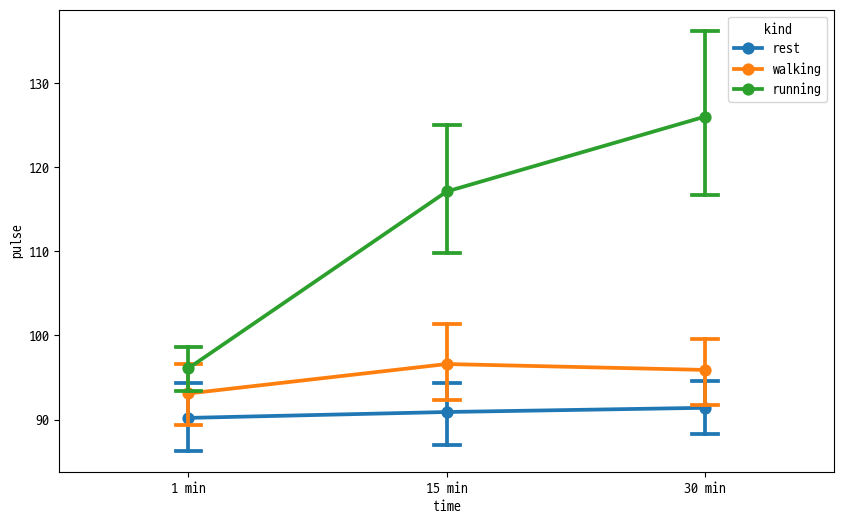

In [73]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'time', y = 'pulse', hue = 'kind', data = exercise, capsize = 0.1)
plt.show()

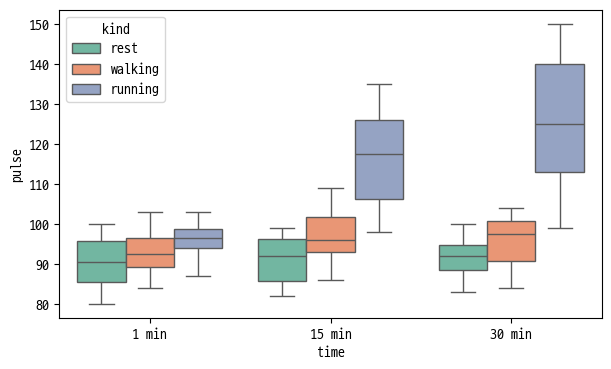

In [74]:
plt.figure(figsize = (7,4))
sns.boxplot(x = 'time', y = 'pulse', hue = 'kind', data = exercise, palette="Set2")
plt.show()

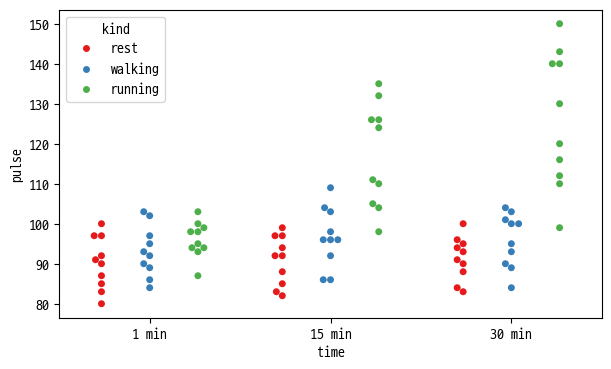

In [75]:
plt.figure(figsize = (7, 4))
sns.swarmplot(x = 'time', y = 'pulse', hue = 'kind', data = exercise, dodge = True, palette = "Set1")
plt.show()